**environment.yml**

``` yaml
name: aqi
channels:
  - defaults
dependencies:
  - pip=23.0.1
  - python=3.11.2
  - pip:
      - jupyterlab==3.6.3
      - matplotlib==3.7.1
      - missingno==0.5.2
      - numpy==1.24.2
      - pandas==1.5.3
      - plotly-express==0.4.1
      - seaborn==0.12.2
```

# Analyzing Air Quality in Gurugram Using Machine Learning
## Exploratory Data Analysis (EDA) & Data Visualization 

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msn
import seaborn as sns
from utils.sub_index_functions import *
import plotly.express as px

## Reading data

- Read data using pandas by setting `nan` values as `np.nan`
- A lot of missong values also recorded as "**None**", so convert it into `np.nan`

In [2]:
gurugram_df = pd.read_csv('Gurugram_Hourly_Compiled.csv',
                          na_values = np.nan, low_memory = False)

gurugram_df = gurugram_df.replace(['None'], np.nan)
print(f'Shape of the dataset : {gurugram_df.shape}\n')
gurugram_df.head()

Shape of the dataset : (147531, 31)



,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,...,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3,AQI,AQI_Bucket
0,04-03-2020 00:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.5,3.01,5.08,2.04,...,3.1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,04-03-2020 01:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,6.15,2,...,3.03,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,04-03-2020 02:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.6,1.85,12.72,2.02,...,3.08,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,04-03-2020 03:00,Vikas Sadan,67.6,377.93,29.18,317.53,10.53,1.31,11.46,1.96,...,3.02,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,04-03-2020 04:00,Vikas Sadan,72.72,319.8,33.66,273.25,9.98,0.63,4.76,2.01,...,2.97,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Correcting data type

In [3]:
# Cechcing the data-types of each columns

gurugram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147531 entries, 0 to 147530
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     147531 non-null  object 
 1   Station      107273 non-null  object 
 2   PM2.5        130274 non-null  object 
 3   NO           130088 non-null  object 
 4   NO2          131613 non-null  object 
 5   NOx          127216 non-null  object 
 6   SO2          103535 non-null  object 
 7   CO           134827 non-null  object 
 8   Ozone        97932 non-null   object 
 9   Benzene      92017 non-null   object 
 10  Toluene      88127 non-null   object 
 11  Eth-Benzene  60590 non-null   object 
 12  MP-Xylene    73470 non-null   object 
 13  O            22216 non-null   object 
 14  Temp         22222 non-null   object 
 15  RH           73261 non-null   object 
 16  WS           52699 non-null   object 
 17  WD           64356 non-null   object 
 18  SR           54735 non-n

In [4]:
print(gurugram_df.Station.unique())

['Vikas Sadan' 'Sector 51' 'NISE' 'Teri Gram' nan]


In [5]:
print(gurugram_df.AQI_Bucket.unique())

[nan 'Poor' 'Moderate' 'Very Poor' 'Satisfactory' 'Severe' 'Good']


- Most of the columns have a data type `object` and only a few have `numerical` type.
- Now we know `Station` and `AQI_Bucket` contains text, thus `object` is the data type.
- `Datetime` column, we need to convert it into `datetime` type.
- Rest all columns contains numerical values, so need to convert those into `numeric` type clumns.

In [6]:
# converting Datetime column, into pandas datetime format.

date_corrected_1 = pd.to_datetime(gurugram_df['Datetime'][:107273], format = '%d-%m-%Y %H:%M')
date_corrected_2 = pd.to_datetime(gurugram_df['Datetime'][107273:], format = '%Y-%m-%d %H:%M')

# gurugram_df.Datetime = pd.to_datetime(gurugram_df.Datetime)
gurugram_df.Datetime = pd.concat([date_corrected_1, date_corrected_2])

In [7]:
# converting desired column, into numerical type.

for column in gurugram_df.columns:
    
    if column == 'Datetime' or column == 'Station' or column == 'AQI_Bucket':
        pass
    else:
        gurugram_df[column] = gurugram_df[column].apply(pd.to_numeric)

In [8]:
# verify the data type convertion process

gurugram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147531 entries, 0 to 147530
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Datetime     147531 non-null  datetime64[ns]
 1   Station      107273 non-null  object        
 2   PM2.5        130274 non-null  float64       
 3   NO           130088 non-null  float64       
 4   NO2          131613 non-null  float64       
 5   NOx          127216 non-null  float64       
 6   SO2          103535 non-null  float64       
 7   CO           134827 non-null  float64       
 8   Ozone        97932 non-null   float64       
 9   Benzene      92017 non-null   float64       
 10  Toluene      88127 non-null   float64       
 11  Eth-Benzene  60590 non-null   float64       
 12  MP-Xylene    73470 non-null   float64       
 13  O            22216 non-null   float64       
 14  Temp         22222 non-null   float64       
 15  RH           73261 non-null   floa

- Now all the columns in the dataset are using correct data types.
- This indicates the data type convertion process is successful.
- Also drop 'AQI' and 'AQI_Bucket', because we can compute those 2.

In [9]:
styles = [dict(selector='caption', props=[('text-align', 'center'), ('font-size', '160%'), ('background-color' , '#F0F0F0')])]

# Dropping AQI and AQI_Bucket columns
# Changing null station names to'Unknown'

gurugram_df = gurugram_df.drop(['AQI', 'AQI_Bucket'], axis = 1)
gurugram_df.Station = gurugram_df.Station.fillna('Unknown')
gurugram_df = gurugram_df.set_index('Datetime')

## Check for missing data and rough pattern

In [10]:
imp_AQI_params = ['PM10', 'PM2.5', 'SO2', 'NOx', 'CO', 'NH3', 'O3']

def data_percentage_line(percentage, location):
    
    '''
    Given a percentage value and location value (integer) plots axis horizontal line
    '''
    
    plt.axhline(percentage/100)
    plt.text(location , percentage/100, f'{percentage}% of data is available', fontsize = 12, va = 'center', ha = 'center', backgroundcolor = 'w')

In [11]:
def plot_data_availability(dataFrame, loc1, loc2, loc3, title_str):
    
    msn.bar(dataFrame, color = 'dodgerblue', sort = 'descending', labels = True, fontsize = 13)
    data_percentage_line(75, loc1)
    data_percentage_line(50, loc2)
    data_percentage_line(25, loc3)
    plt.title(f'Data availability vs Parameters : {title_str}\n', fontsize = 20)
    plt.show()

In [12]:
def plot_data_availability_AQI(dataFrame, loc1, loc2, loc3, title_str):
        
    msn.bar(dataFrame[imp_AQI_params], color = 'dodgerblue', sort = 'descending', labels = True, fontsize = 13, label_rotation = 0)
    data_percentage_line(75, loc1)
    data_percentage_line(50, loc2)
    data_percentage_line(25, loc3)
    plt.title(f'Data availability vs Parameters for AQI calculation : {title_str}\n', fontsize = 20)
    plt.show()

In [13]:
def plot_nullity_AQI(dataFrame, title_str):
    
    msn.matrix(dataFrame[imp_AQI_params],  color = (0.117, 0.564, 1), sparkline = False, fontsize = 13, label_rotation = 0)
    plt.title(f'Nullity distribution of AQI calculation parameters : {title_str}\n', fontsize = 20)
    plt.show()

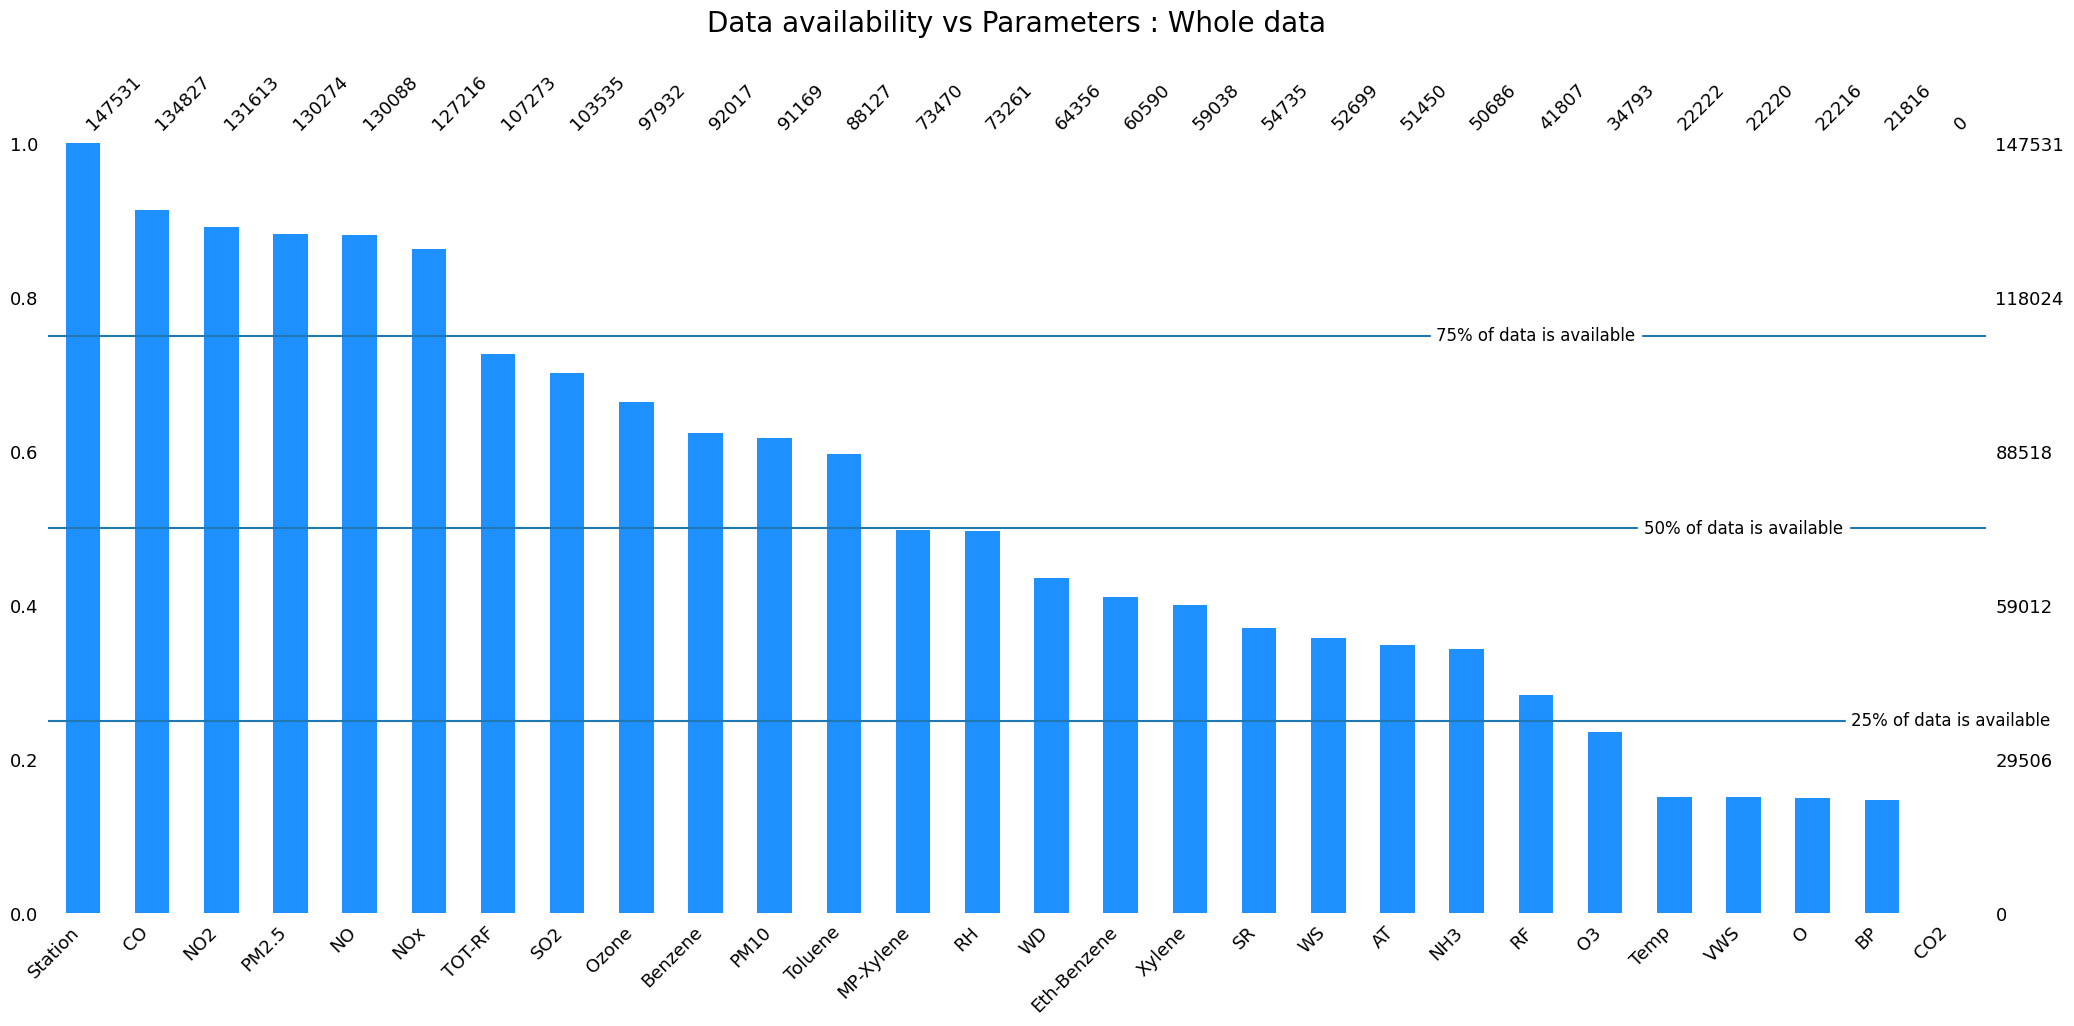

In [14]:
plot_data_availability(gurugram_df, 21, 24, 27, 'Whole data')

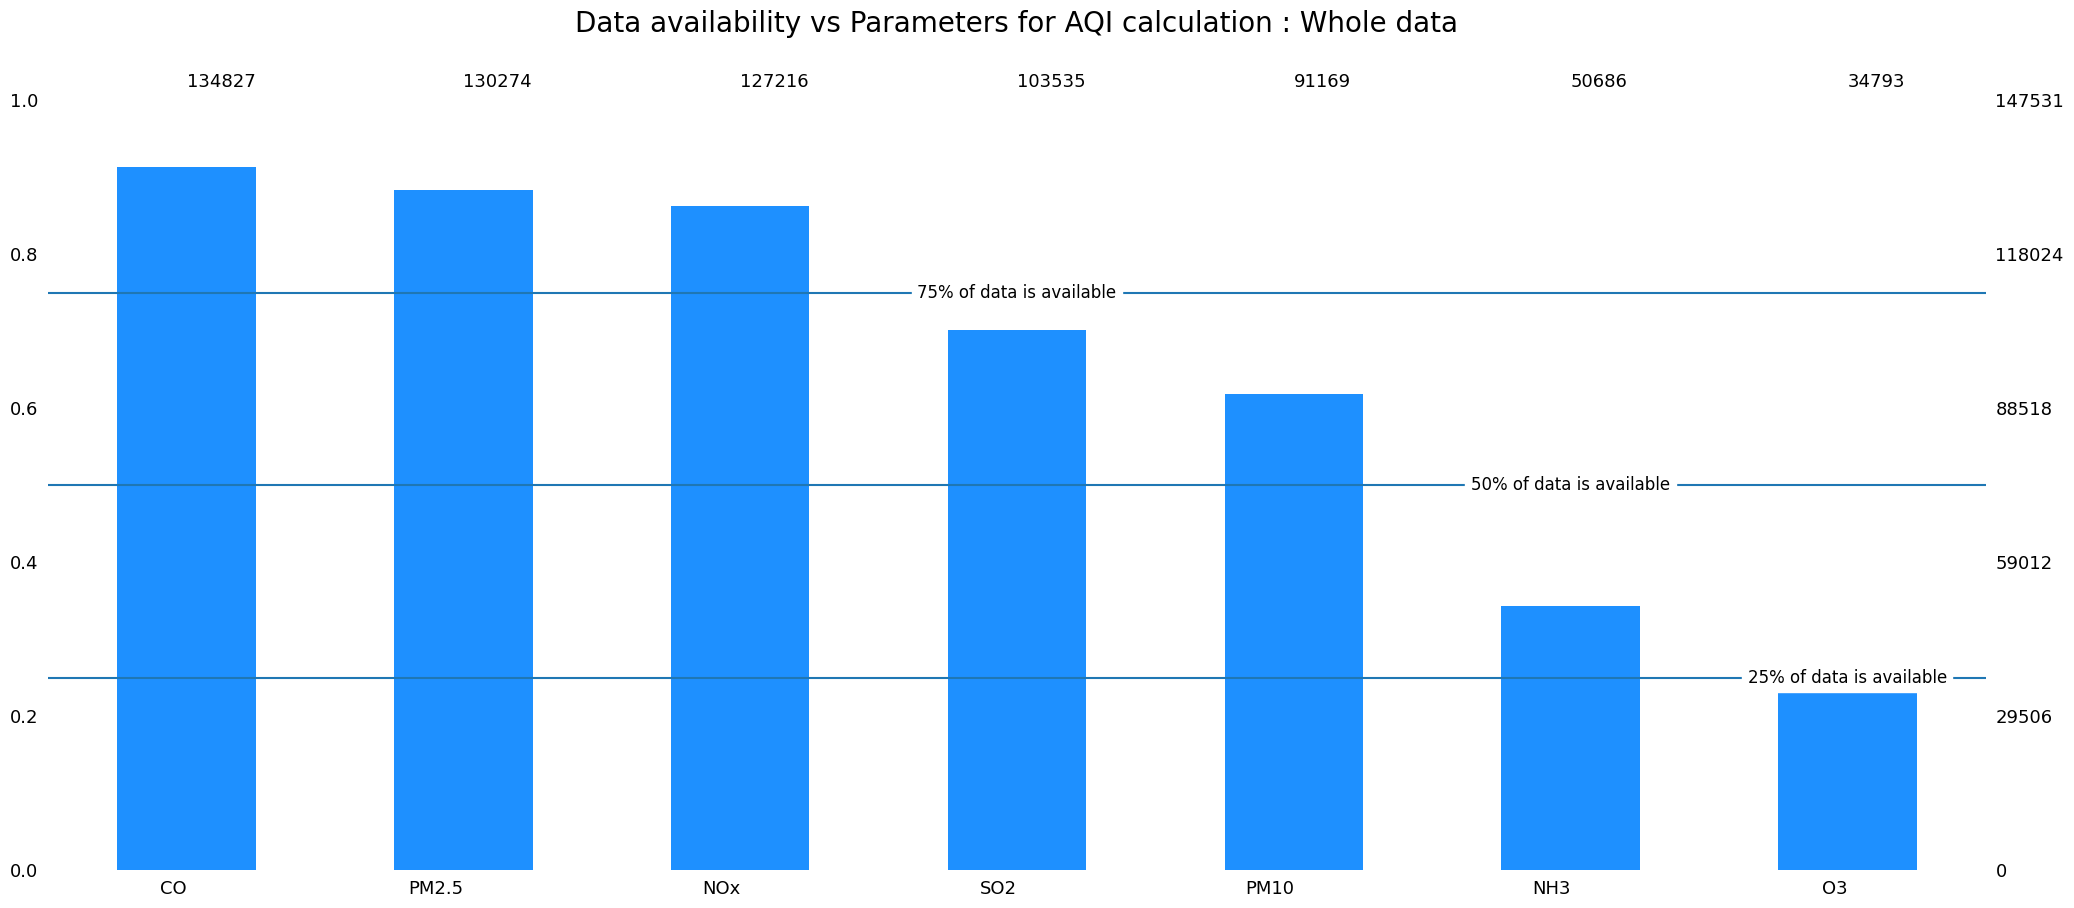

In [15]:
plot_data_availability_AQI(gurugram_df, 3, 5, 6, 'Whole data')

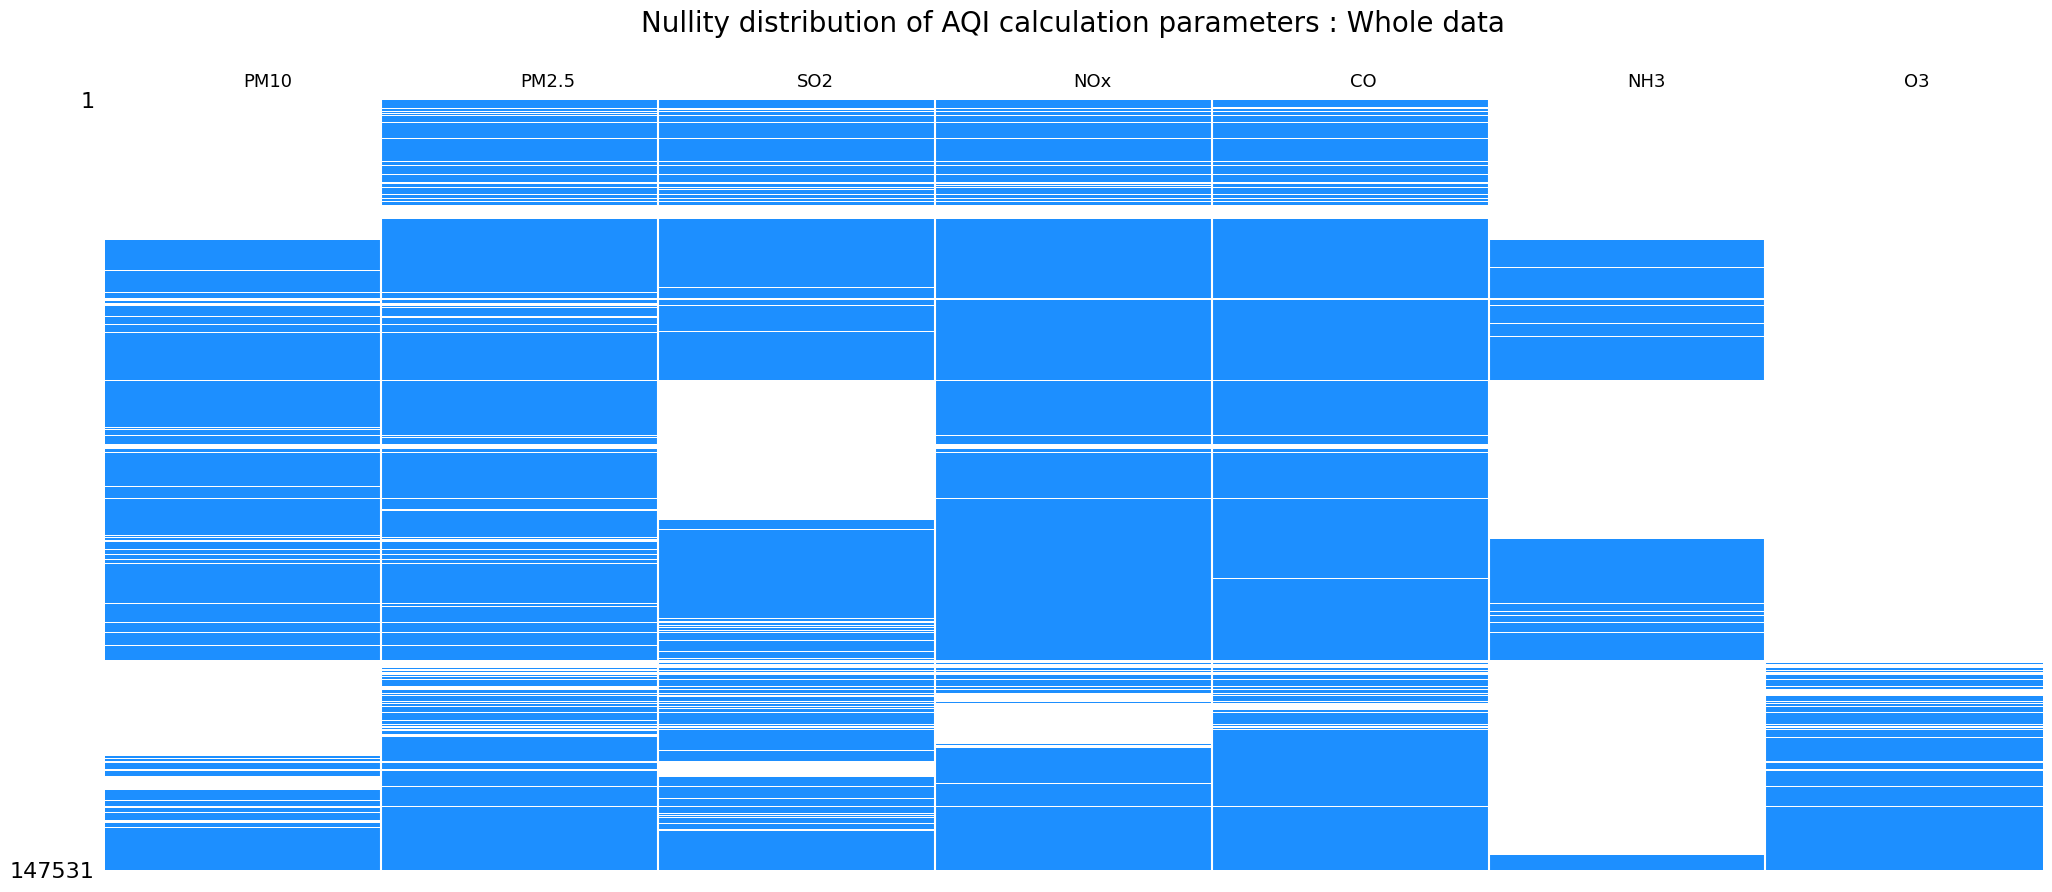

In [16]:
plot_nullity_AQI(gurugram_df, 'Whole data')

- From the above plots visualy it's clear we have good amount of missing data.
- The 2 important parameters for calculation AQI are `PM10` and `PM2.5` value.
    - There are occations both are missing at same time.
    - Breaking the data based on station name might help us in dealing with missing data.

### Station wise data

In [17]:
def create_date_time_features(dataframe):

    dataframe['Day'] = dataframe.index.day
    dataframe['Week_Day'] = dataframe.index.day_name()    
    dataframe['Month'] = dataframe.index.month
    dataframe['MonthName'] = dataframe.index.month_name()
    dataframe['Year'] = dataframe.index.year
    dataframe['MM_YY'] = dataframe.Year.map(str) + '_' + dataframe.Month.map(str).apply(lambda x : '0' + x if len(x) < 2 else x)

    return dataframe.sort_index()

In [18]:
def months_with_mist_missing(dataframe, rows, station):
        
    dataframe = dataframe[dataframe[imp_AQI_params].isnull().all(1)][['O3', 'NH3']].fillna(1)
    dataframe = create_date_time_features(dataframe)
    
    dataframe = dataframe.groupby('MM_YY')[['O3', 'NH3']].agg(sum).sort_values(['O3', 'NH3'], ascending = False)
    dataframe = dataframe.reset_index().drop('NH3', axis = 1).rename(columns = {'MM_YY' : 'Month_Year', 'O3' : 'Missing_Count'})
    print(f"Top {rows} months where whole important data is missing for '{station}'\n")
    
    return dataframe.head(rows)

#### Vikas Sadan

In [19]:
vikas_sadan_df = gurugram_df.query('Station == "Vikas Sadan"').copy().sort_index()
print(f'Shape of the dataset : {vikas_sadan_df.shape}\n')
vikas_sadan_df.head()

Shape of the dataset : (26816, 28)



,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,...,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-04 00:00:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.50,3.01,5.08,2.04,5.98,...,773.65,-0.27,3.10,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 01:00:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,6.15,2.00,5.97,...,773.42,-0.27,3.03,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 02:00:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.60,1.85,12.72,2.02,6.07,...,772.70,-0.27,3.08,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 03:00:00,Vikas Sadan,67.60,377.93,29.18,317.53,10.53,1.31,11.46,1.96,6.06,...,772.20,-0.27,3.02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 04:00:00,Vikas Sadan,72.72,319.80,33.66,273.25,9.98,0.63,4.76,2.01,5.93,...,772.15,-0.27,2.97,NaN,NaN,0.0,NaN,NaN,NaN,NaN


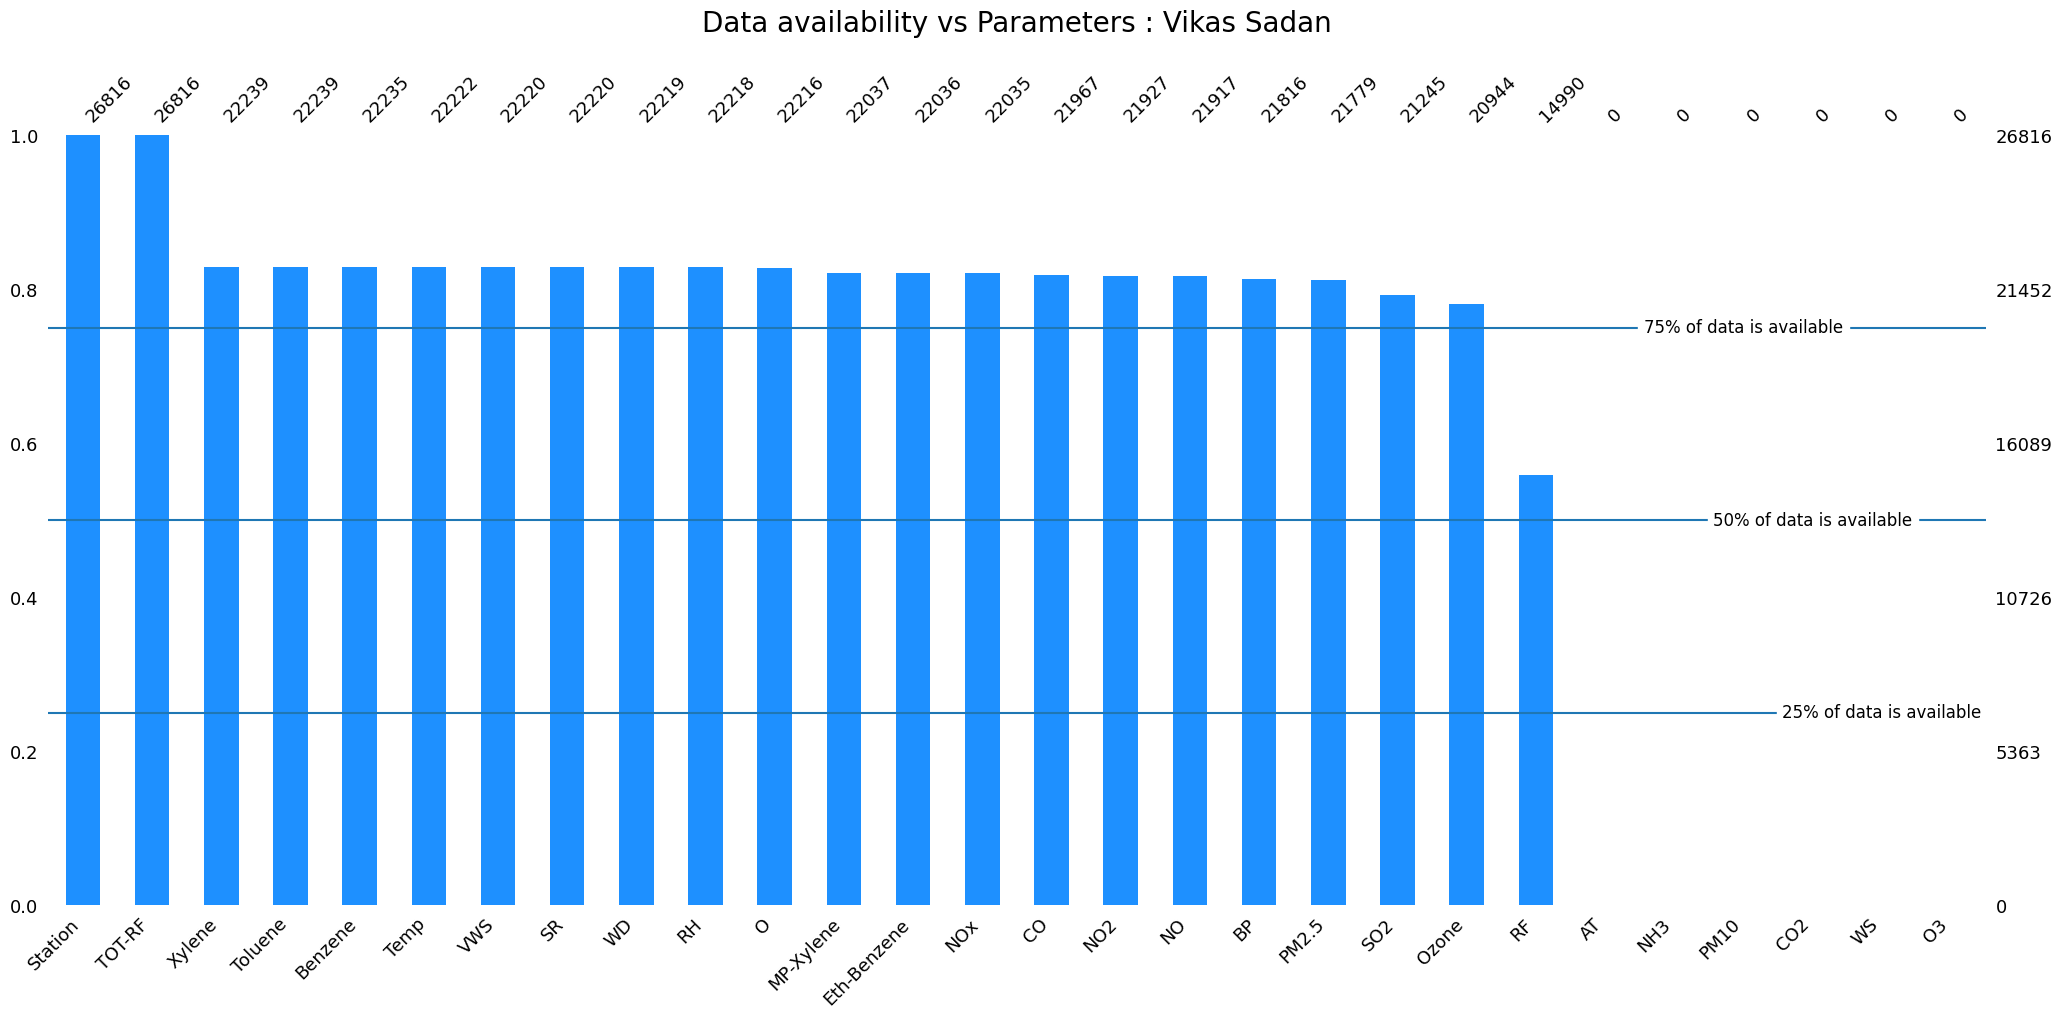

In [20]:
plot_data_availability(vikas_sadan_df, 24, 25, 26, 'Vikas Sadan')

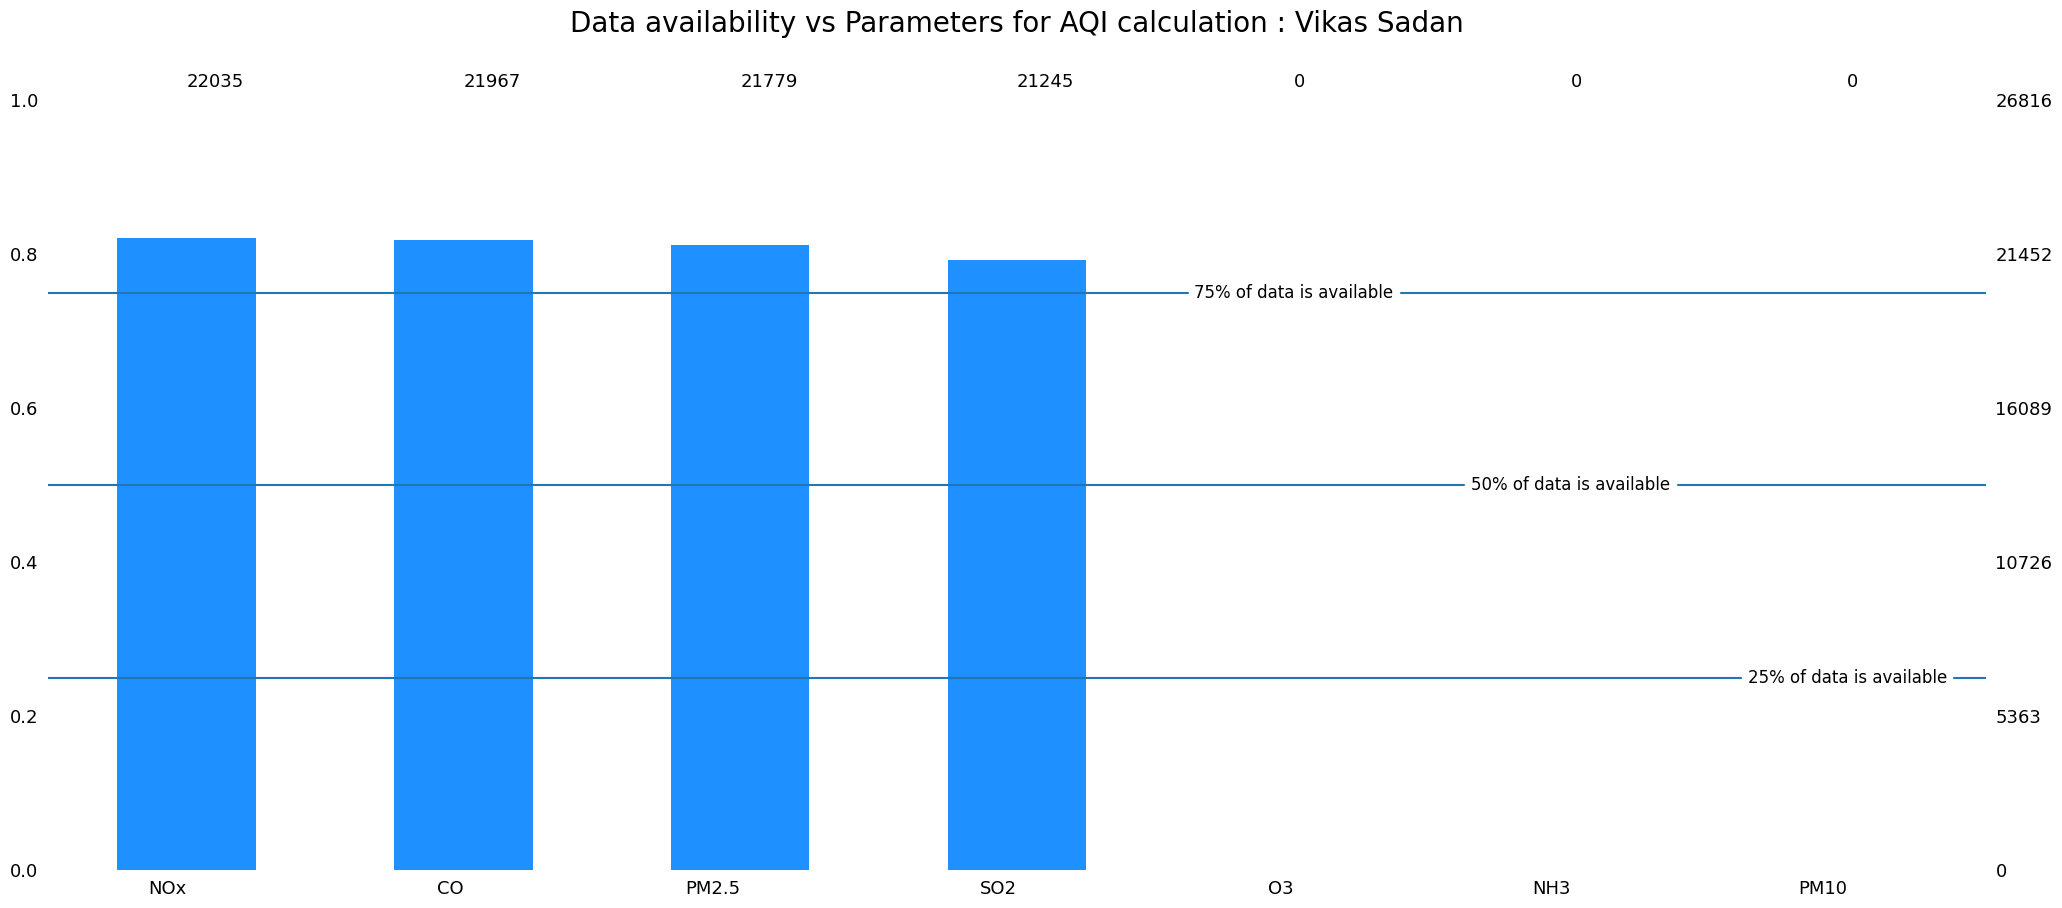

In [21]:
plot_data_availability_AQI(vikas_sadan_df, 4, 5, 6, 'Vikas Sadan')

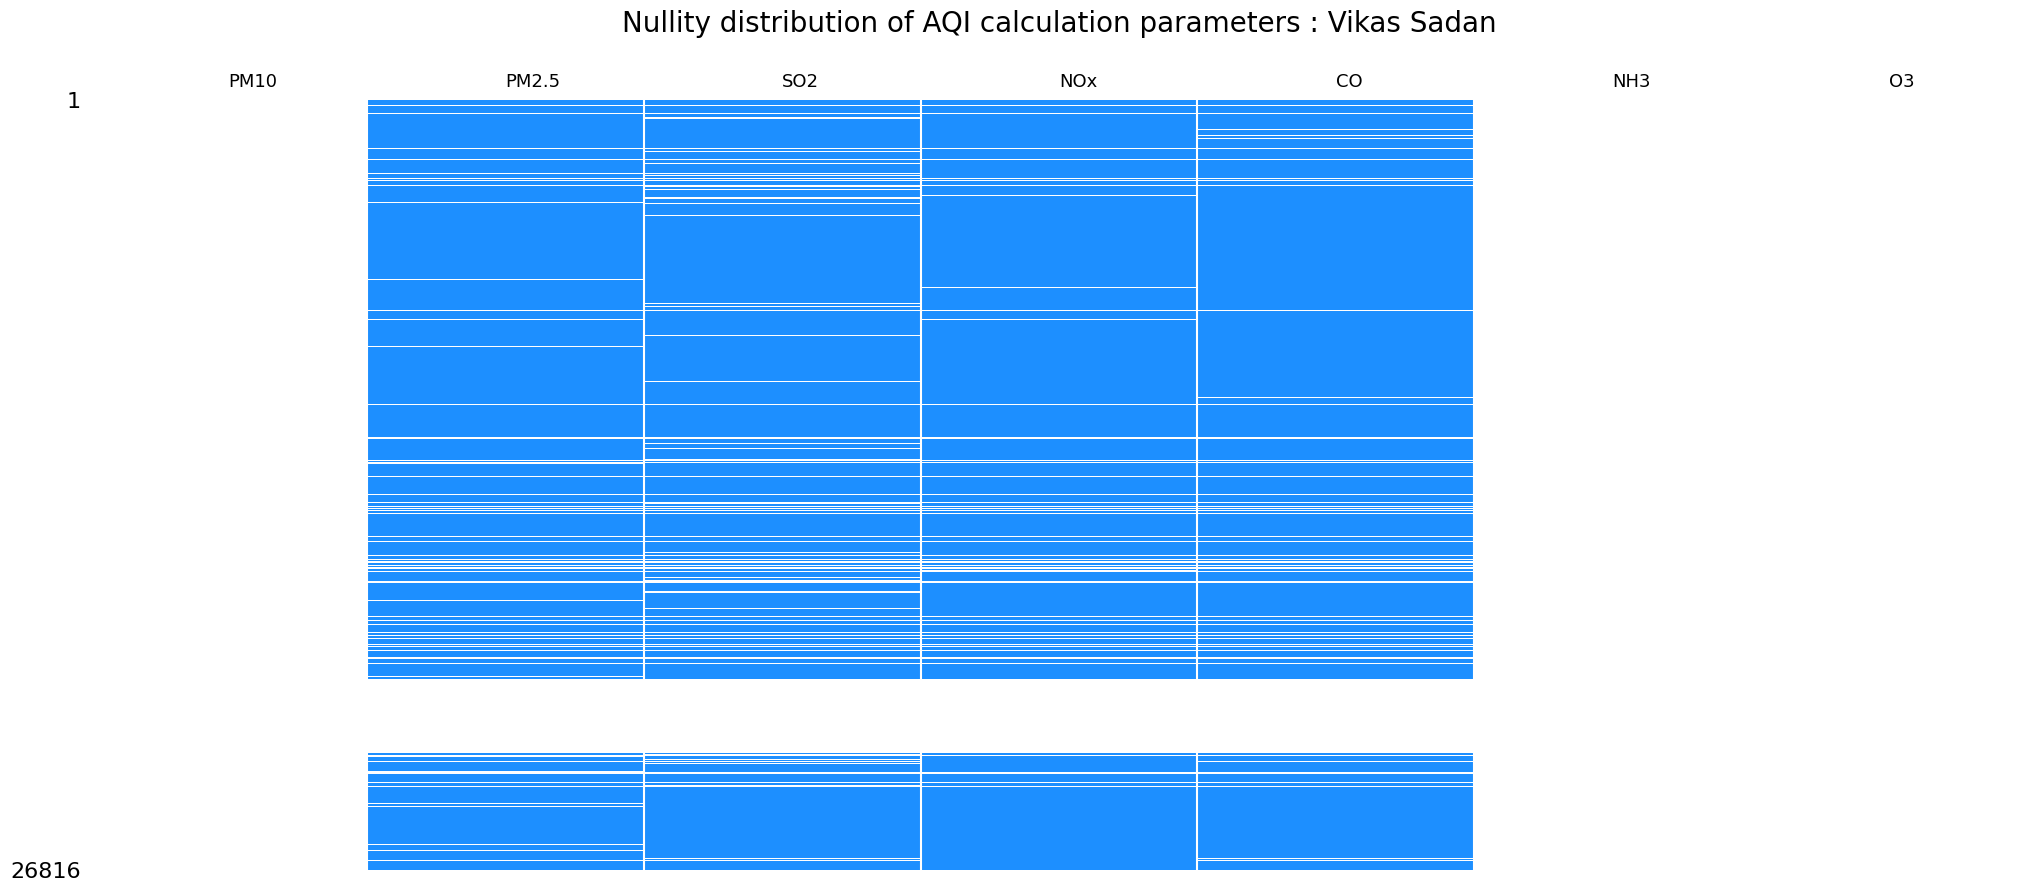

In [22]:
plot_nullity_AQI(vikas_sadan_df, 'Vikas Sadan')

In [23]:
months_with_mist_missing(vikas_sadan_df, 10 , 'Vikas Sadan')

Top 10 months where whole important data is missing for 'Vikas Sadan'



,Month_Year,Missing_Count
0,2022_07,744.0
1,2022_08,744.0
2,2022_09,720.0
3,2022_06,269.0
4,2022_01,229.0
5,2022_10,215.0
6,2022_04,173.0
7,2022_05,148.0
8,2021_12,136.0
9,2021_10,134.0


- It's clear that we don't have any values for `PM10`, `O3`, `NH3` in Vikas Sadan station.
- For `NOx`, `CO`, `PM2.5` and `SO2` only about 80 % is available, and rest are missing.
- Seeing distribution of missing data, there are occations data is completly empty across all parameters, and some times random missing too.
- For the year 2022, a good quantity of data is missing.

#### Sector 51

In [24]:
sector51_df = gurugram_df.query('Station == "Sector 51"').copy().sort_index()
print(f'Shape of the dataset : {sector51_df.shape}\n')
sector51_df.head()

Shape of the dataset : (26825, 28)



,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,...,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-04 00:00:00,Sector 51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 01:00:00,Sector 51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 02:00:00,Sector 51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 03:00:00,Sector 51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 04:00:00,Sector 51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


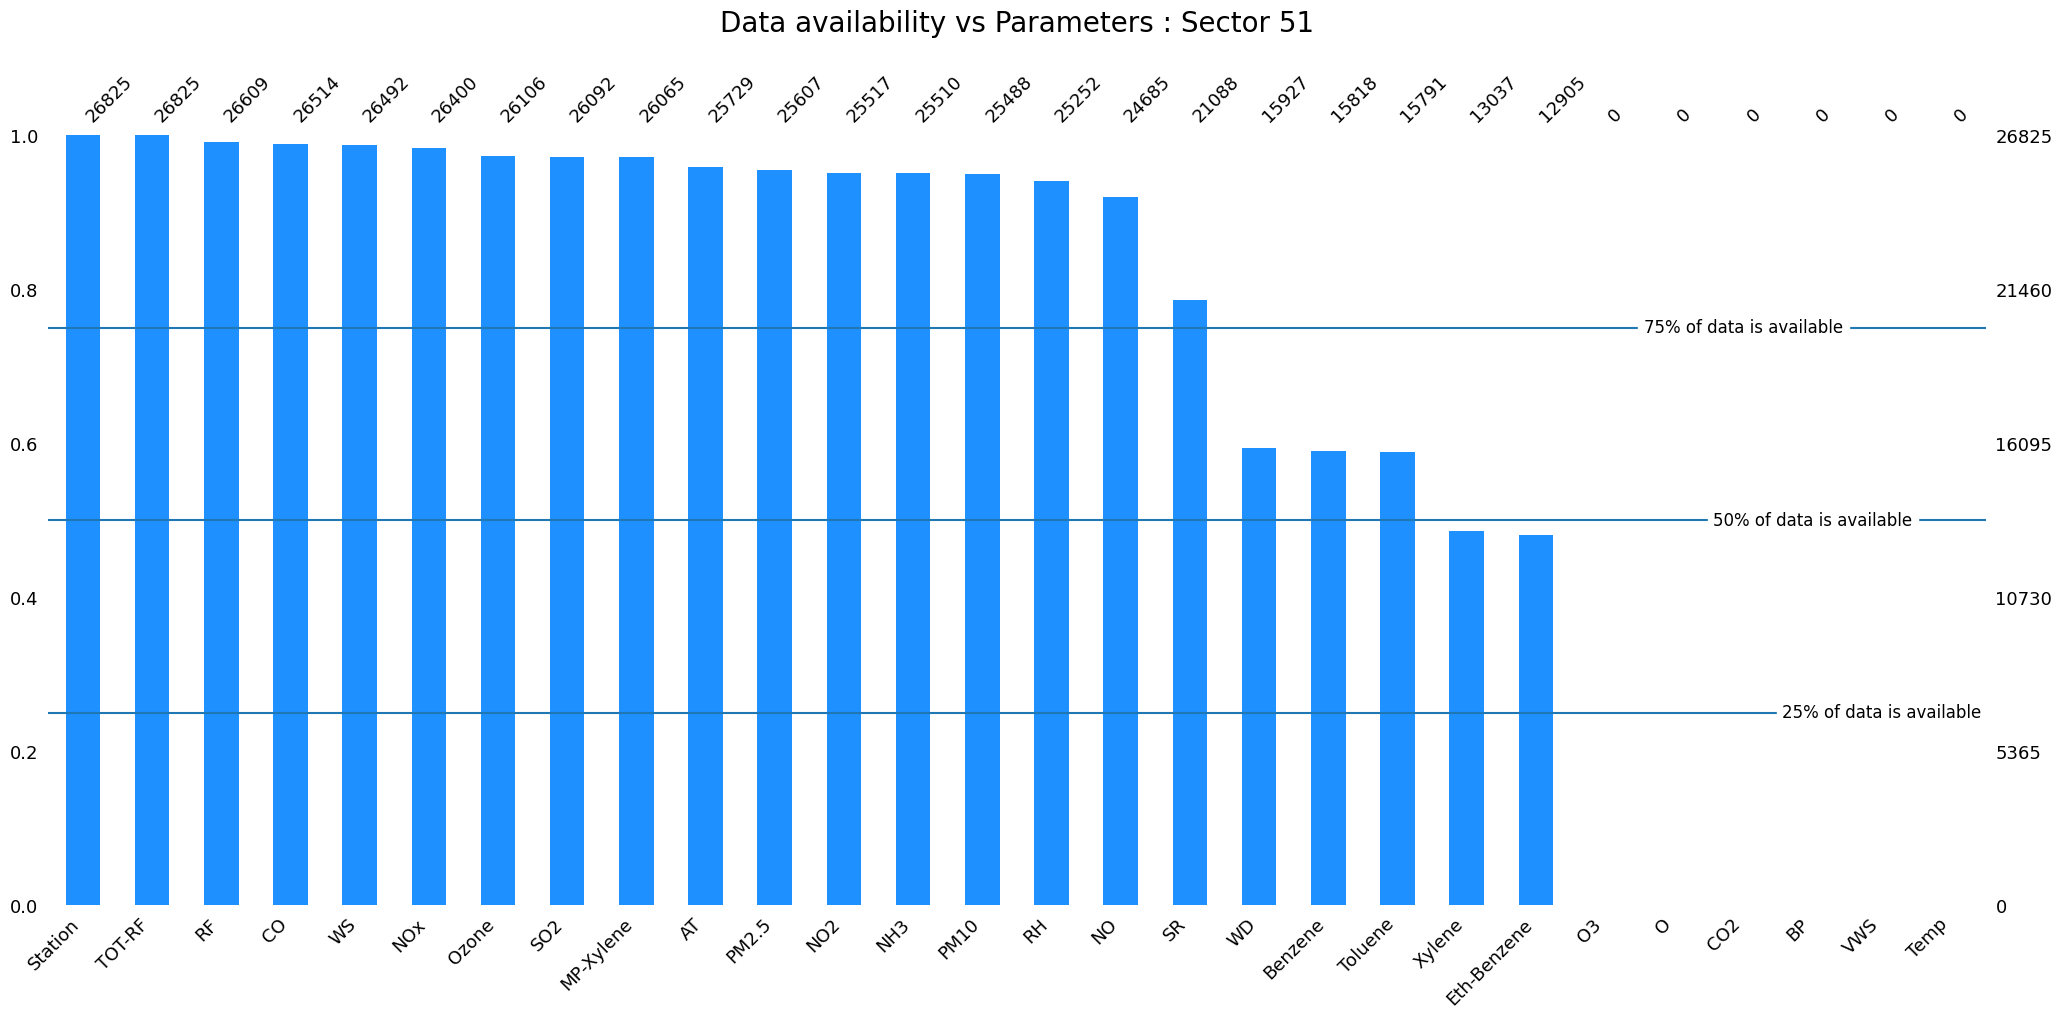

In [25]:
plot_data_availability(sector51_df, 24, 25, 26, 'Sector 51')

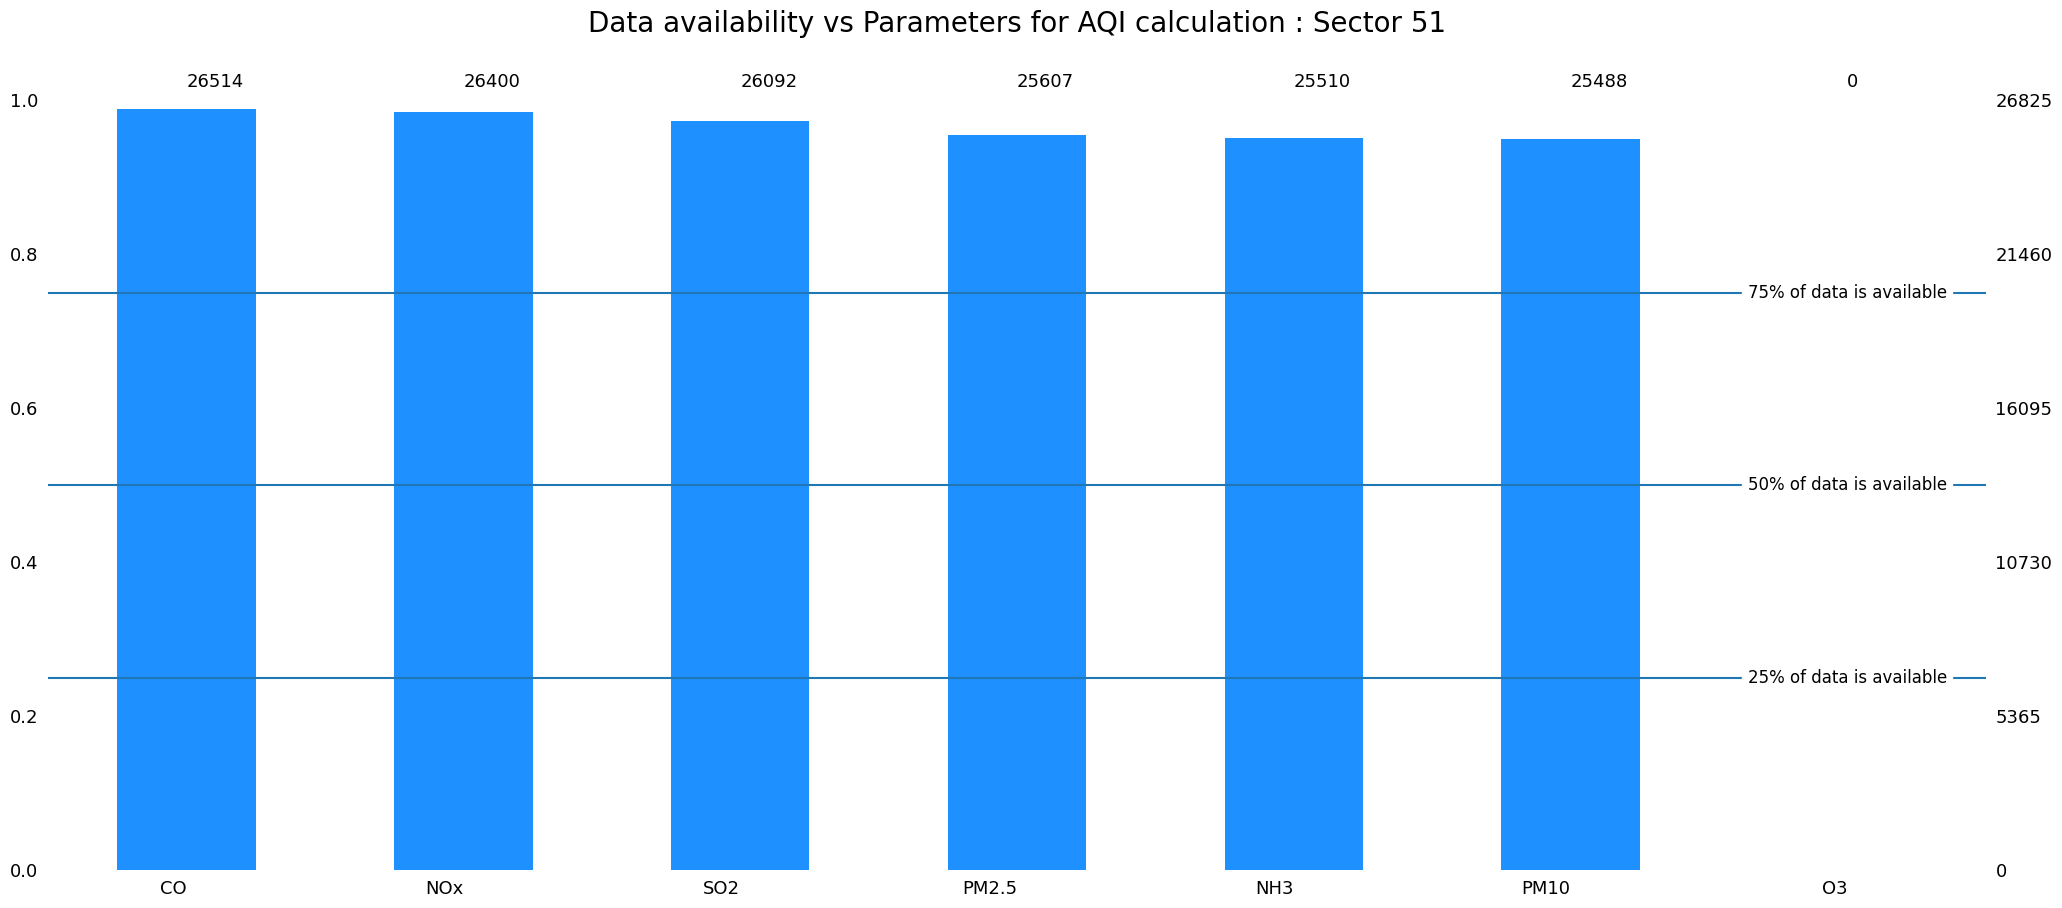

In [26]:
plot_data_availability_AQI(sector51_df, 6, 6, 6, 'Sector 51')

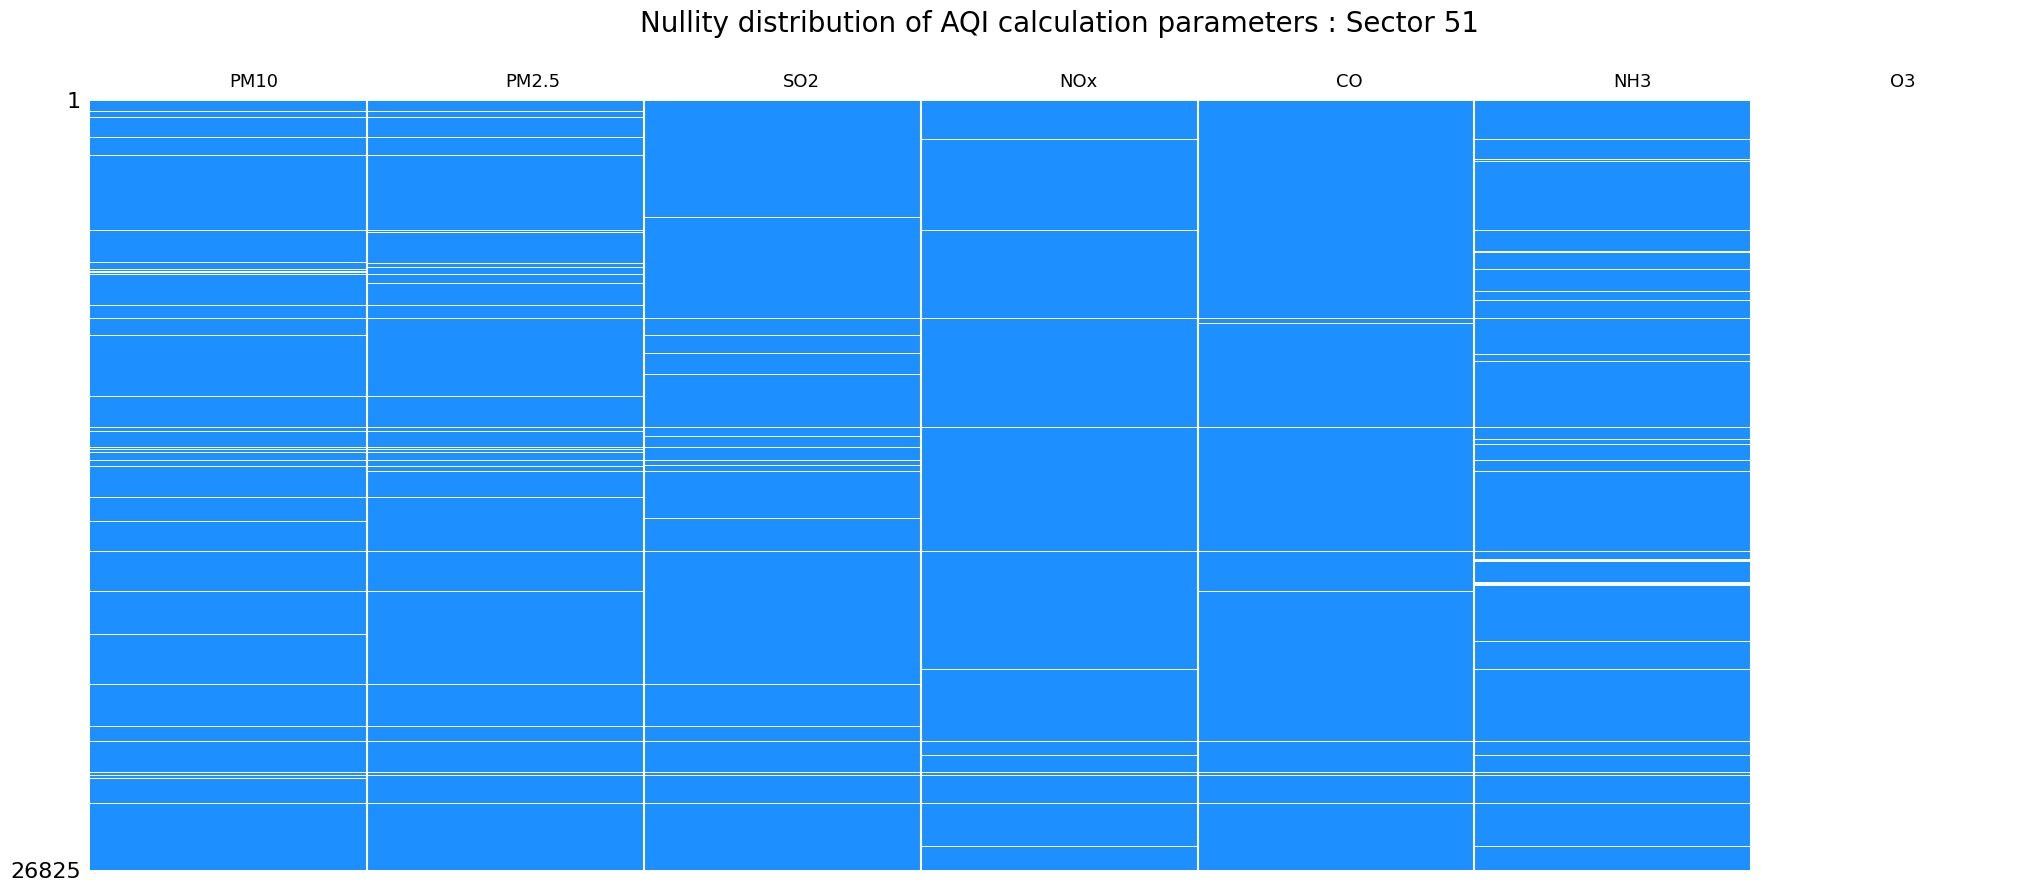

In [27]:
plot_nullity_AQI(sector51_df, 'Sector 51')

In [28]:
months_with_mist_missing(sector51_df, 10 , 'Sector 51')

Top 10 months where whole important data is missing for 'Sector 51'



,Month_Year,Missing_Count
0,2020_03,39.0
1,2022_09,32.0
2,2021_01,17.0
3,2022_11,14.0
4,2021_12,13.0
5,2022_12,12.0
6,2020_07,11.0
7,2020_08,11.0
8,2022_10,9.0
9,2023_01,8.0


- The reading for parameter `O3` is missing in Sector 51 also.
- The data availability is this station is higher and shows missing value is less.
- Except`O3` rest important parameters have morethan 90% of data presence.

#### NISE

In [29]:
nise_df = gurugram_df.query('Station == "NISE"').copy().sort_index()
print(f'Shape of the dataset : {nise_df.shape}\n')
nise_df.head()

Shape of the dataset : (26816, 28)



,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,...,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-04 00:00:00,NISE,88.67,17.92,31.11,49.03,NaN,2.55,5.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,184.54,NaN,NaN,NaN
2020-03-04 01:00:00,NISE,82.42,16.90,29.54,46.43,NaN,2.42,6.72,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,178.92,NaN,NaN,NaN
2020-03-04 02:00:00,NISE,82.35,17.71,29.56,47.33,NaN,2.40,6.11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,187.56,NaN,NaN,NaN
2020-03-04 03:00:00,NISE,102.34,18.05,27.90,45.92,NaN,2.36,4.63,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,211.59,NaN,NaN,NaN
2020-03-04 04:00:00,NISE,97.36,15.49,23.88,39.35,NaN,2.24,4.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,181.50,NaN,NaN,NaN


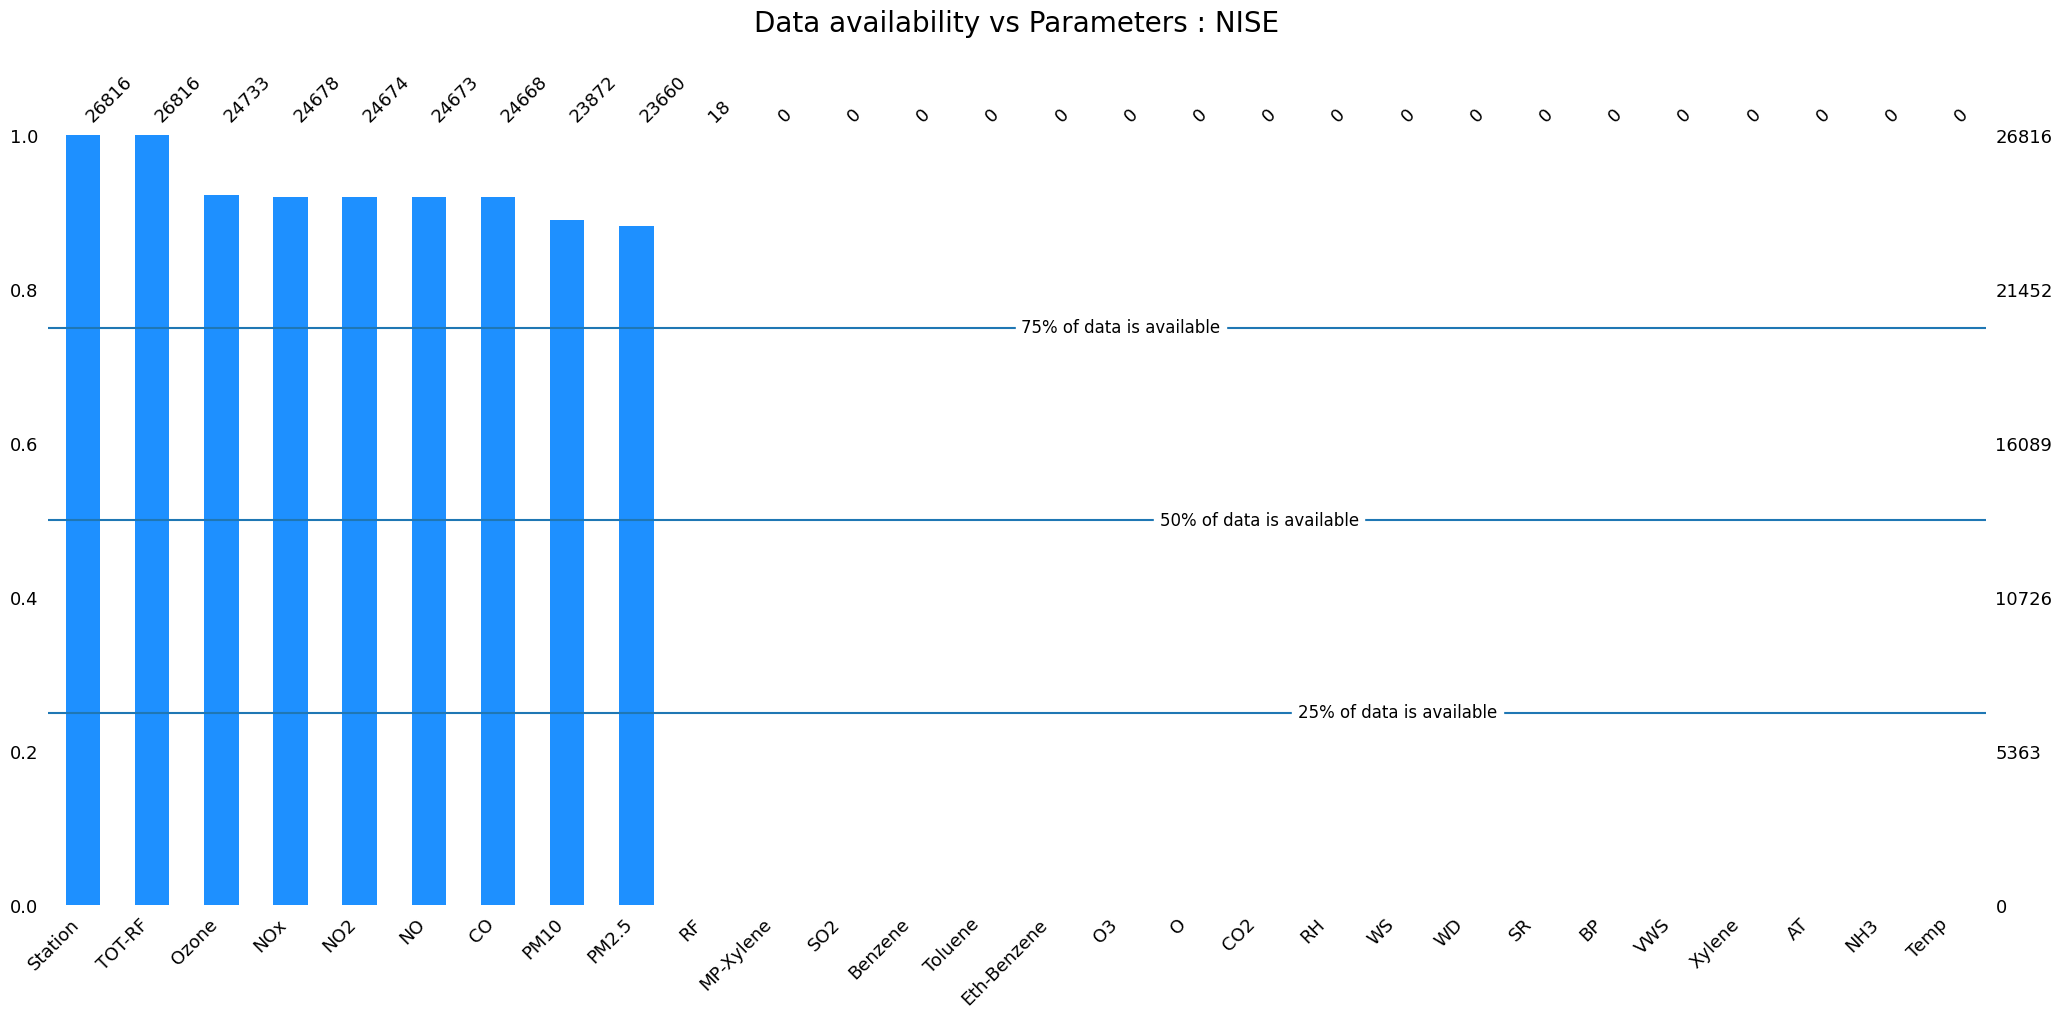

In [30]:
plot_data_availability(nise_df, 15, 17, 19, 'NISE')

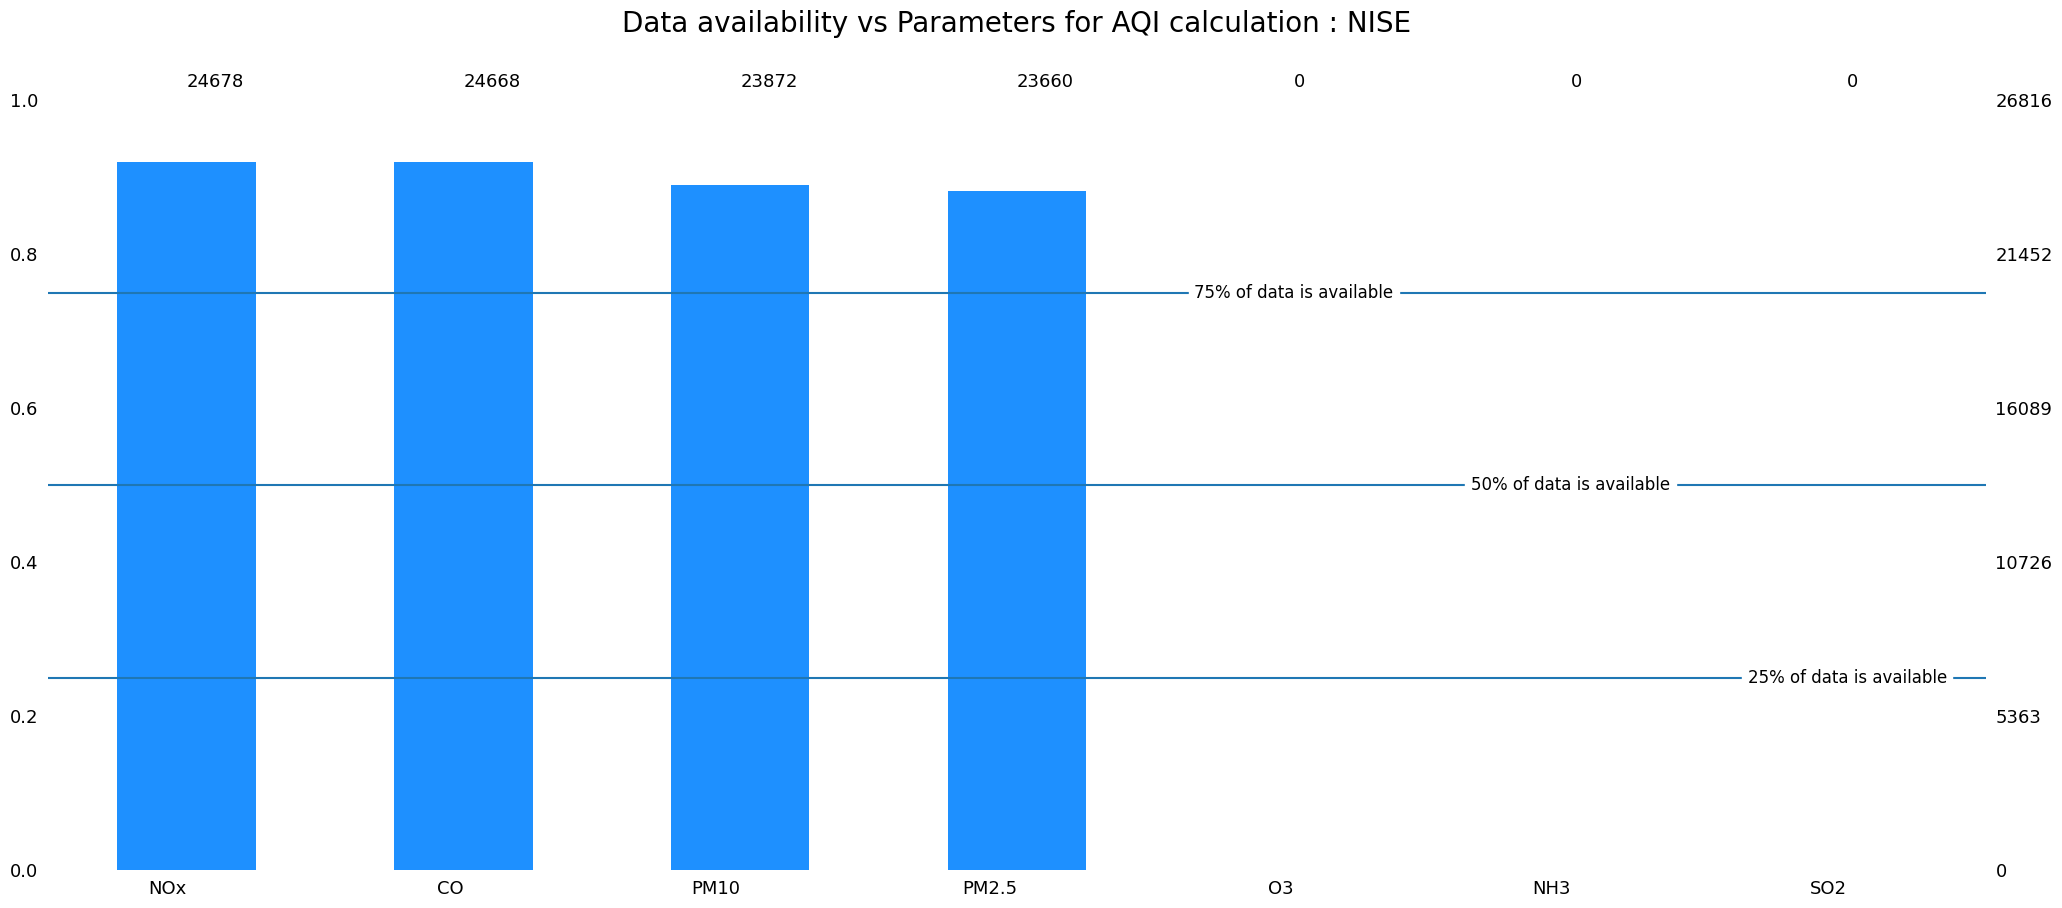

In [31]:
plot_data_availability_AQI(nise_df, 4, 5, 6, 'NISE')

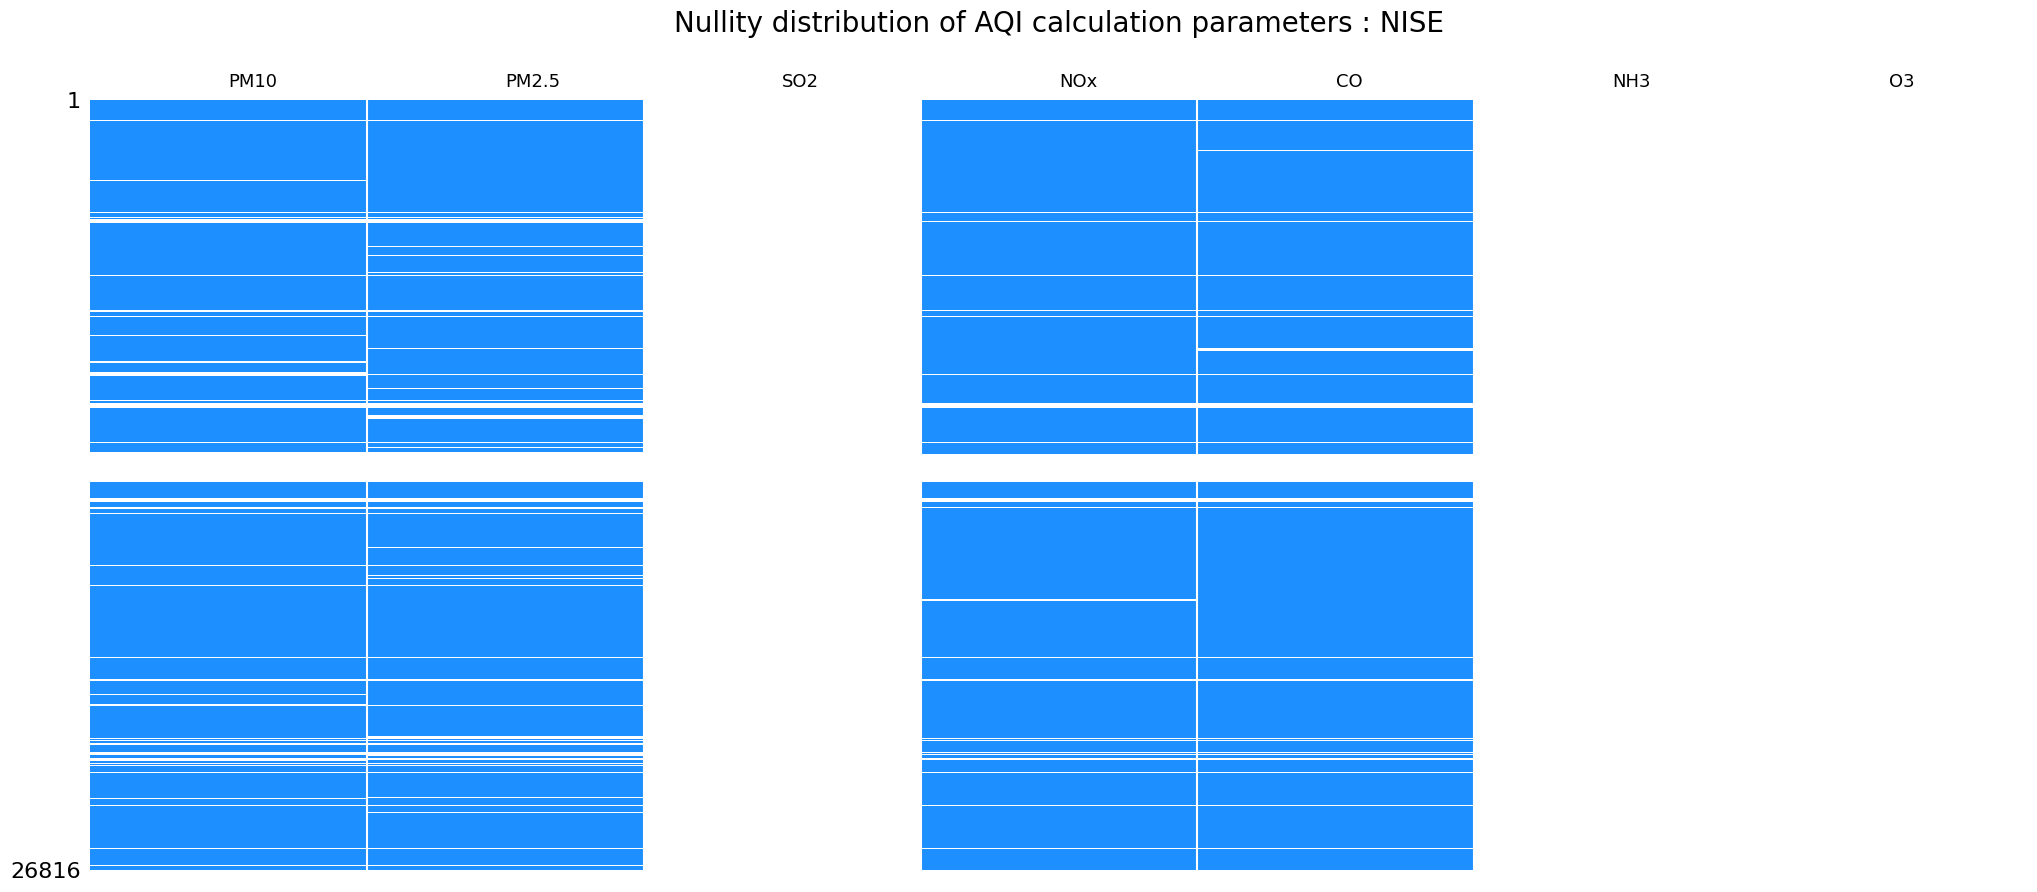

In [32]:
plot_nullity_AQI(nise_df, 'NISE')

In [33]:
months_with_mist_missing(nise_df, 10 , 'NISE')

Top 10 months where whole important data is missing for 'NISE'



,Month_Year,Missing_Count
0,2021_08,744.0
1,2021_09,198.0
2,2021_10,165.0
3,2021_05,161.0
4,2022_10,161.0
5,2021_07,85.0
6,2021_01,70.0
7,2022_09,66.0
8,2020_08,61.0
9,2022_12,48.0


- It's clear that we don't have any values for `SO2`, `O3`, `NH3` in NISE station.
- For `PM10`, `PM2.5`, `NOx` and `CO` almost 90 % is available.
- We also don't have any value for a lot of parameters too, this station records least amount of data.
- Seeing distribution of missing data, there are occations data is completly empty across all parameters, and some times random missing too.
- In year 2021, a good quantity of data is missing.

#### Teri Gram

In [34]:
teri_gram_df = gurugram_df.query('Station == "Teri Gram"').copy().sort_index()
print(f'Shape of the dataset : {teri_gram_df.shape}\n')
teri_gram_df.head()

Shape of the dataset : (26816, 28)



,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,...,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-04 00:00:00,Teri Gram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 01:00:00,Teri Gram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 02:00:00,Teri Gram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 03:00:00,Teri Gram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-03-04 04:00:00,Teri Gram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


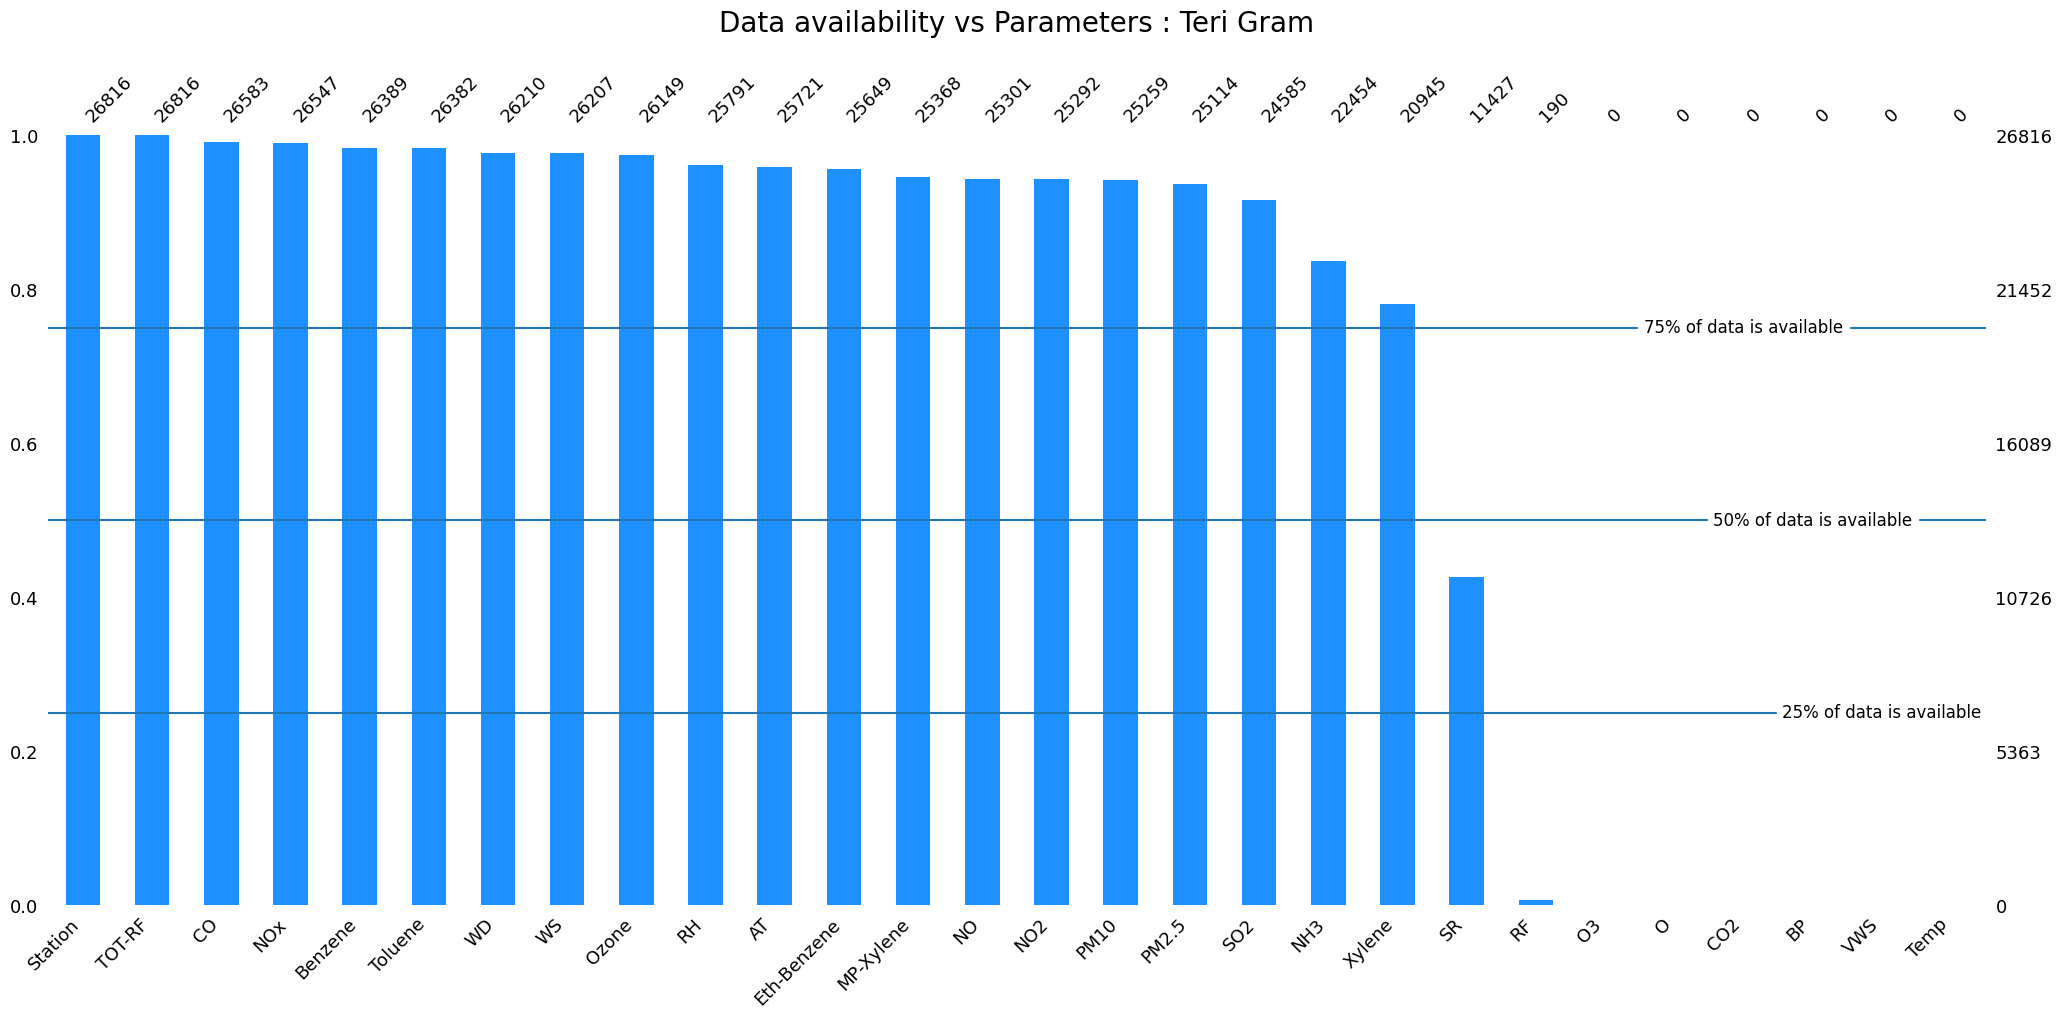

In [35]:
plot_data_availability(teri_gram_df, 24, 25, 26, 'Teri Gram')

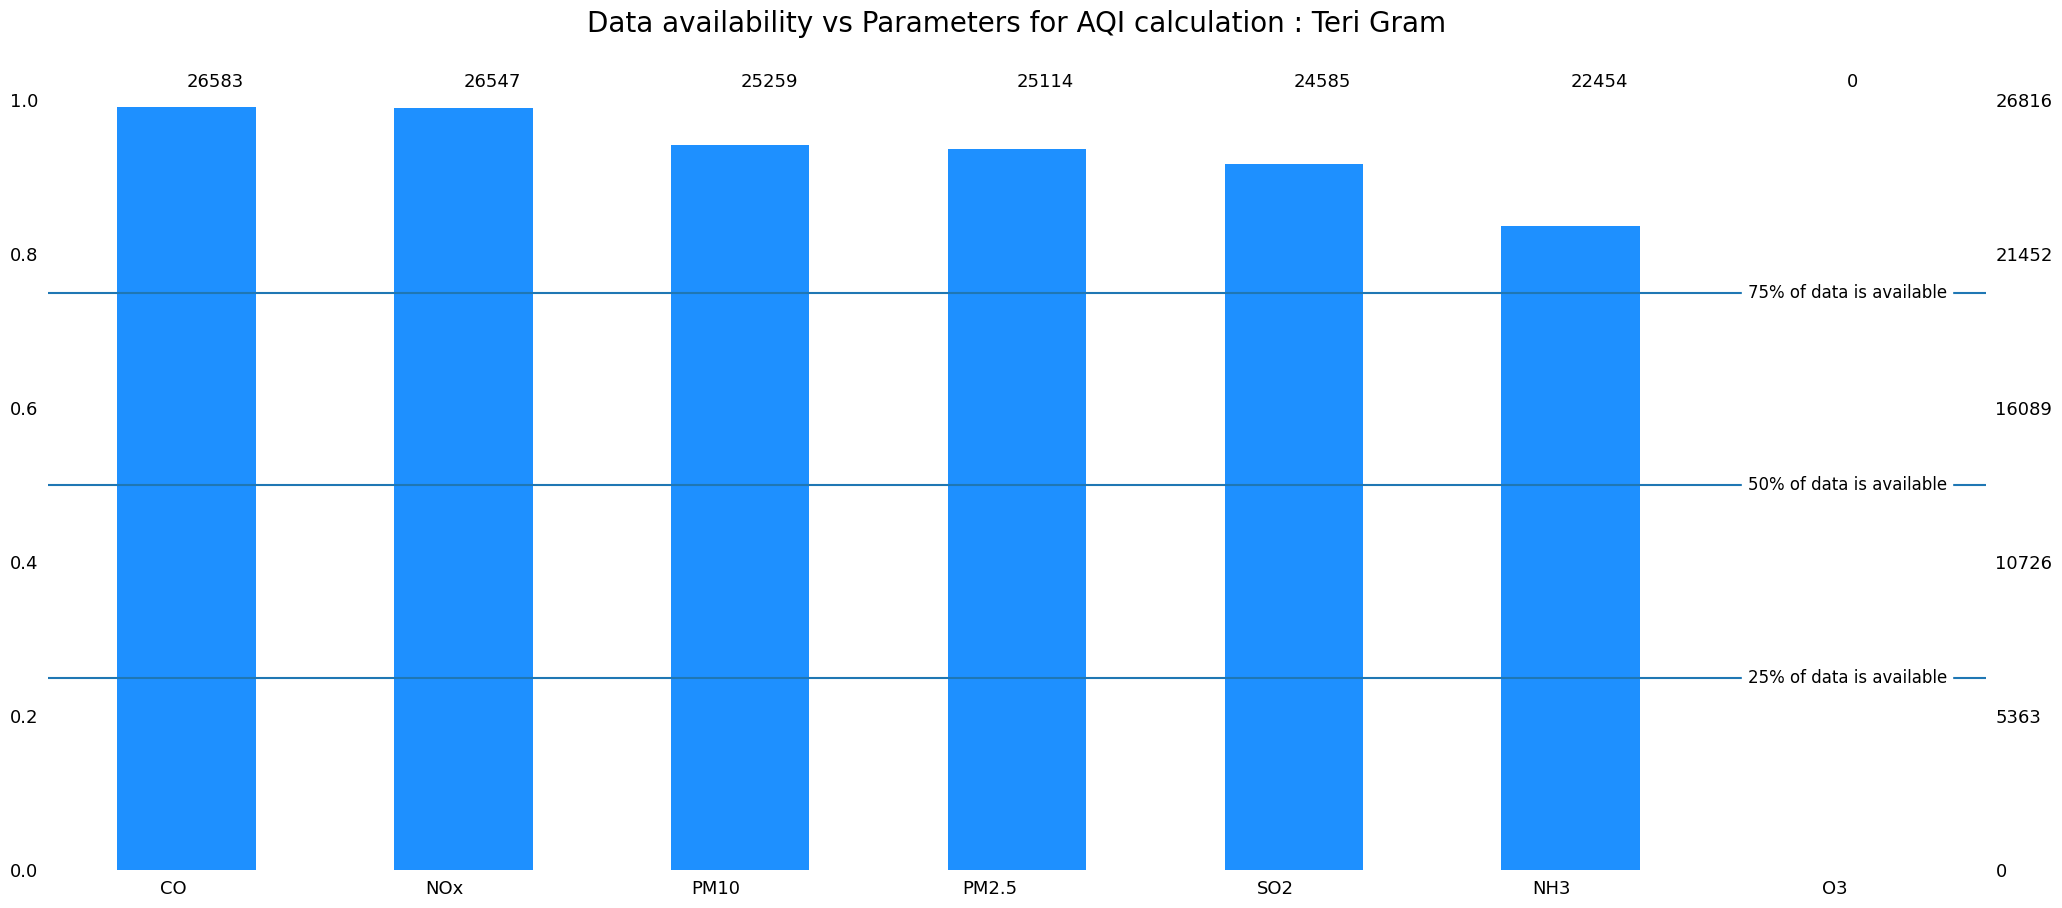

In [36]:
plot_data_availability_AQI(teri_gram_df, 6, 6, 6, 'Teri Gram')

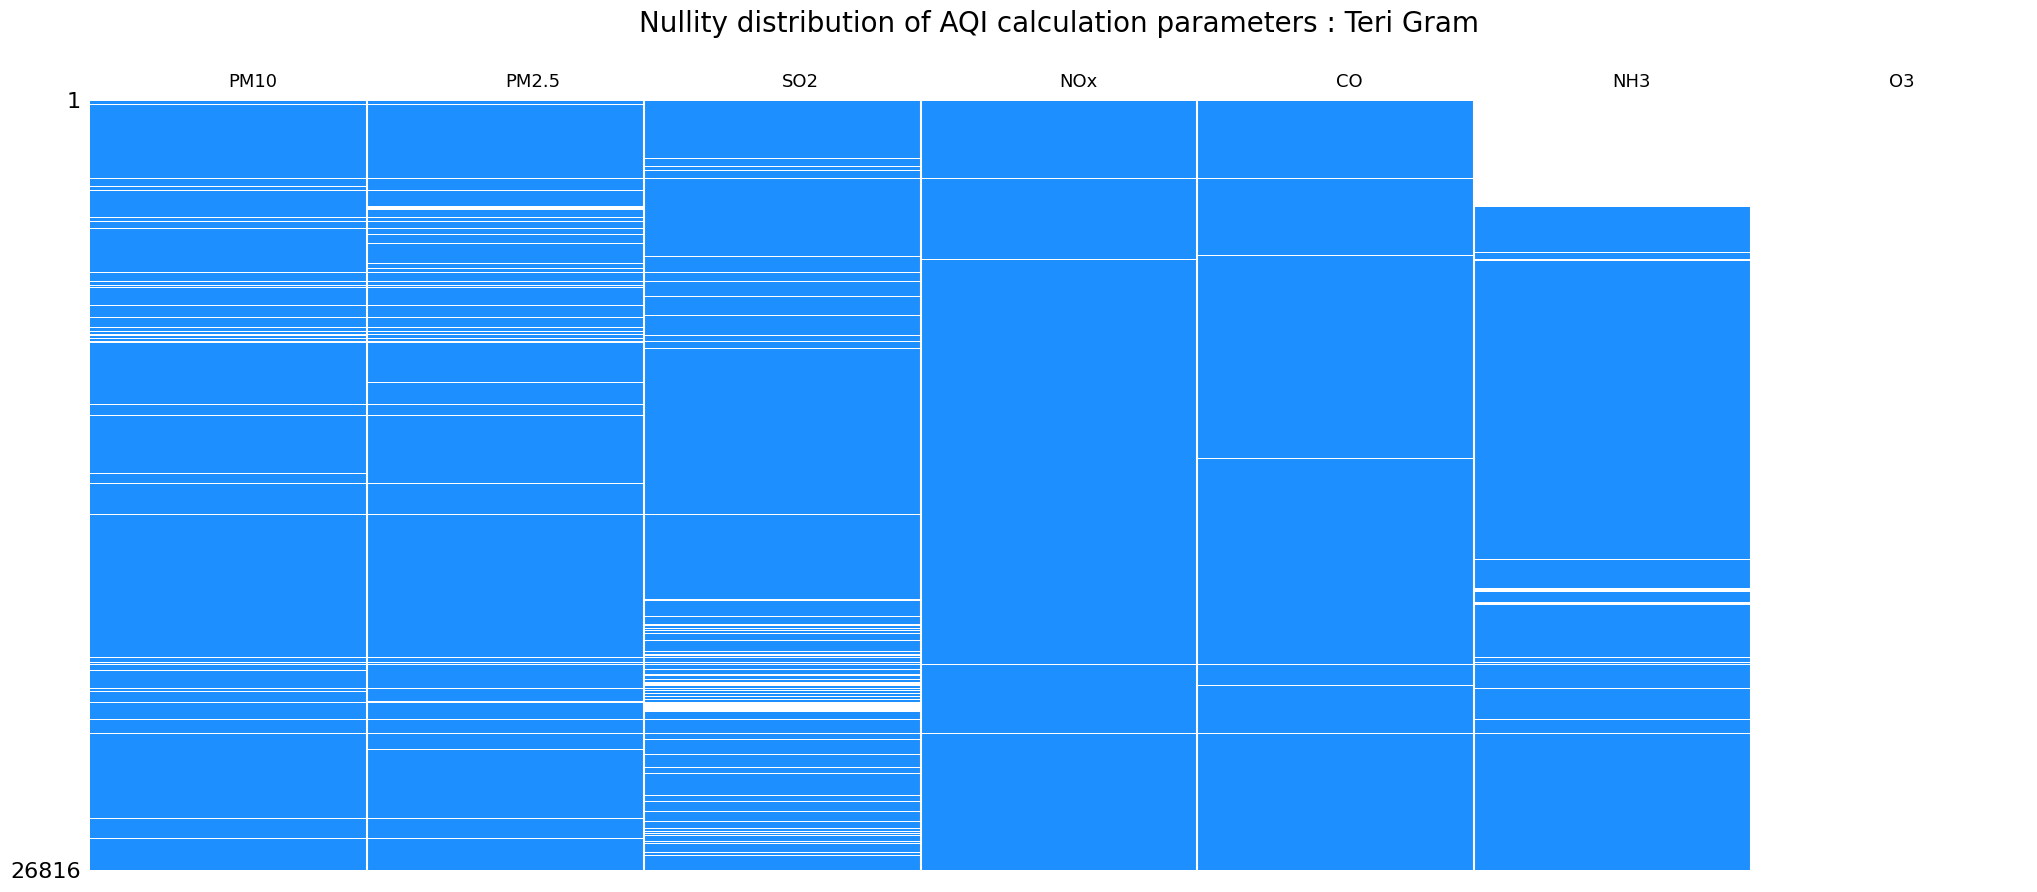

In [37]:
plot_nullity_AQI(teri_gram_df, 'Teri Gram')

In [38]:
months_with_mist_missing(teri_gram_df, 10 , 'Teri Gram')

Top 10 months where whole important data is missing for 'Teri Gram'



,Month_Year,Missing_Count
0,2020_03,39.0
1,2022_07,31.0
2,2022_06,24.0
3,2022_05,16.0
4,2020_06,13.0
5,2022_09,11.0
6,2022_08,10.0
7,2020_08,9.0
8,2022_03,9.0
9,2021_01,1.0


- The reading for parameter `O3` is missing in Teri Gram also, ie we haven't seen any data for this parameter.
- Except`O3` rest important parameters have morethan 85% of data presence.
- Distribution of missing looks like its random missing. 

#### Unknown

In [39]:
unknown_df = gurugram_df.query('Station == "Unknown"').copy().sort_index()
print(f'Shape of the dataset : {unknown_df.shape}\n')
unknown_df.head()

Shape of the dataset : (40258, 28)



,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,...,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-11-27 15:00:00,Unknown,NaN,NaN,12.50,5.85,NaN,0.08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.65
2015-11-27 16:00:00,Unknown,NaN,4.02,10.03,10.34,8.38,1.40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.42
2015-11-27 17:00:00,Unknown,NaN,11.25,7.07,15.14,16.69,1.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.42
2015-11-27 18:00:00,Unknown,NaN,4.55,7.06,8.44,18.85,2.91,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.22
2015-11-27 19:00:00,Unknown,NaN,5.68,7.80,9.67,21.52,4.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.15


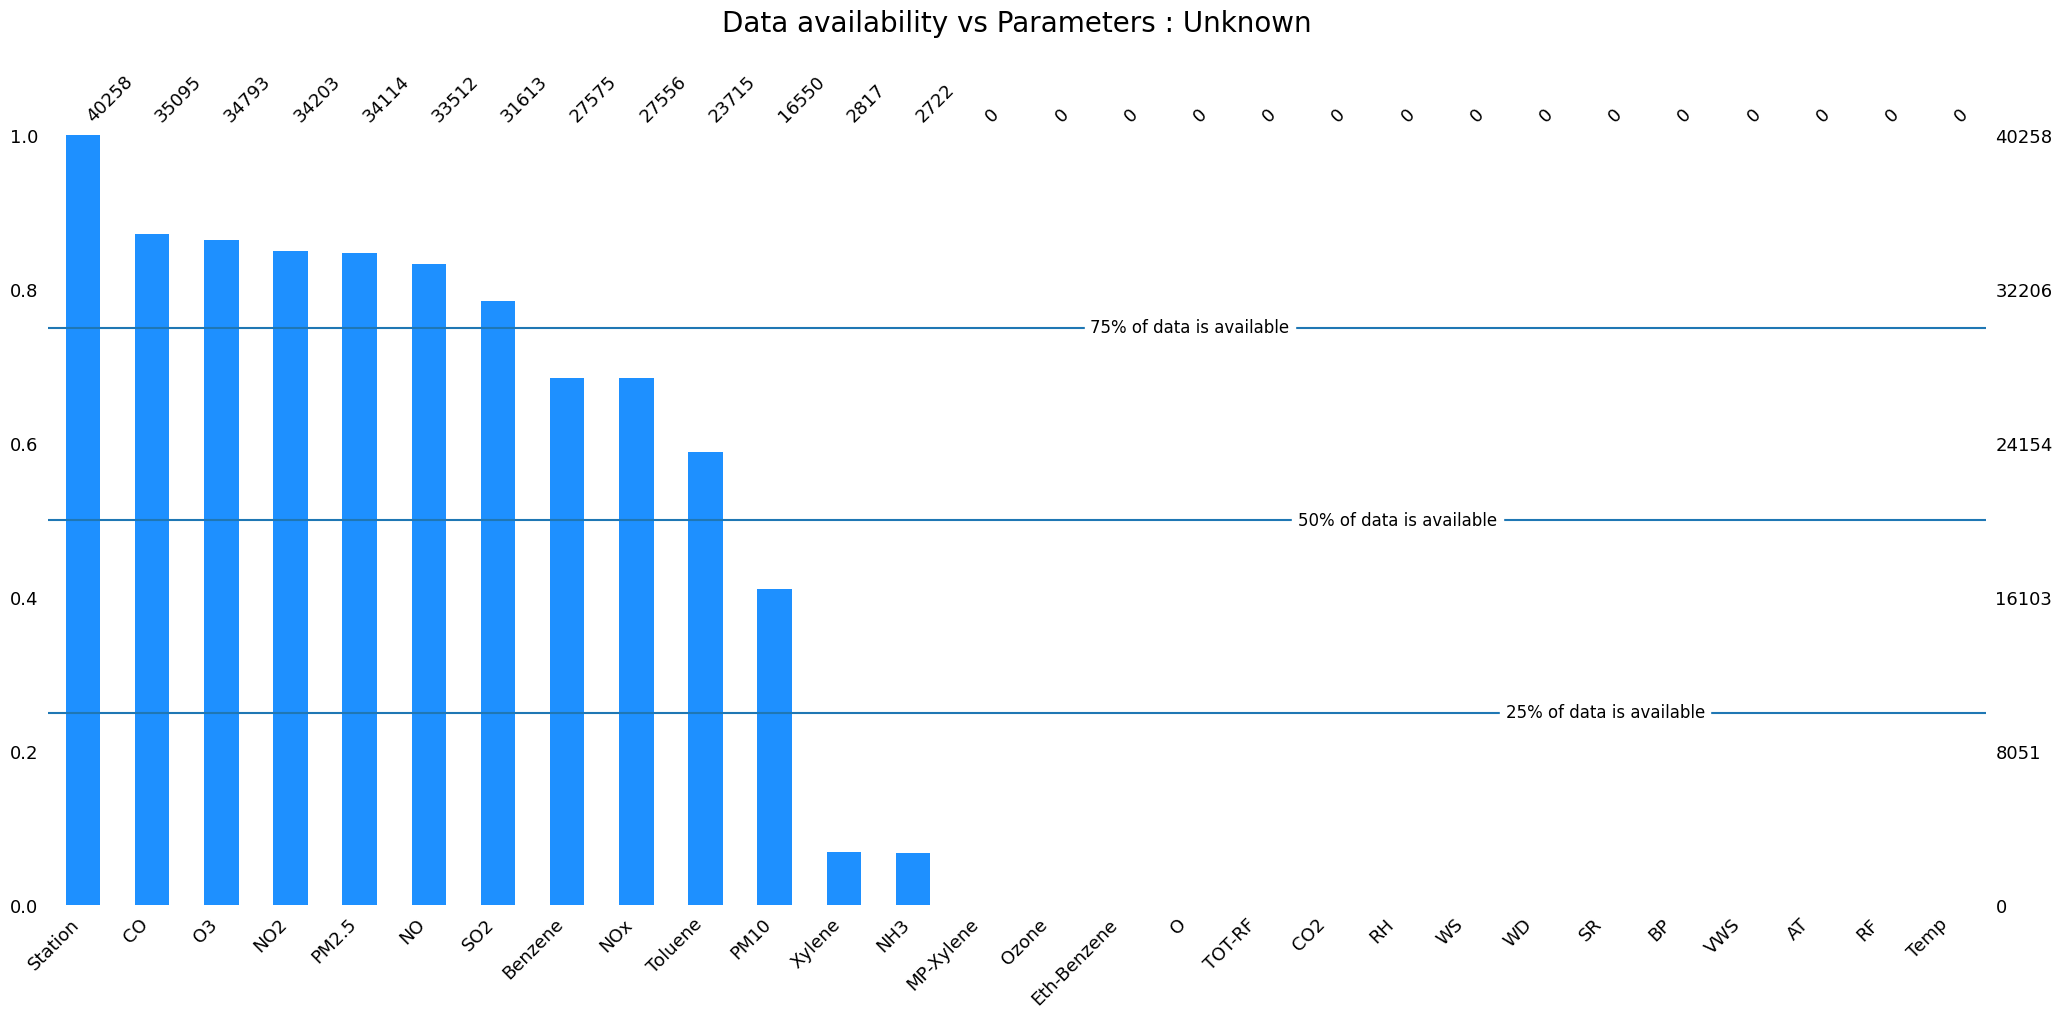

In [40]:
plot_data_availability(unknown_df, 16, 19, 22, 'Unknown')

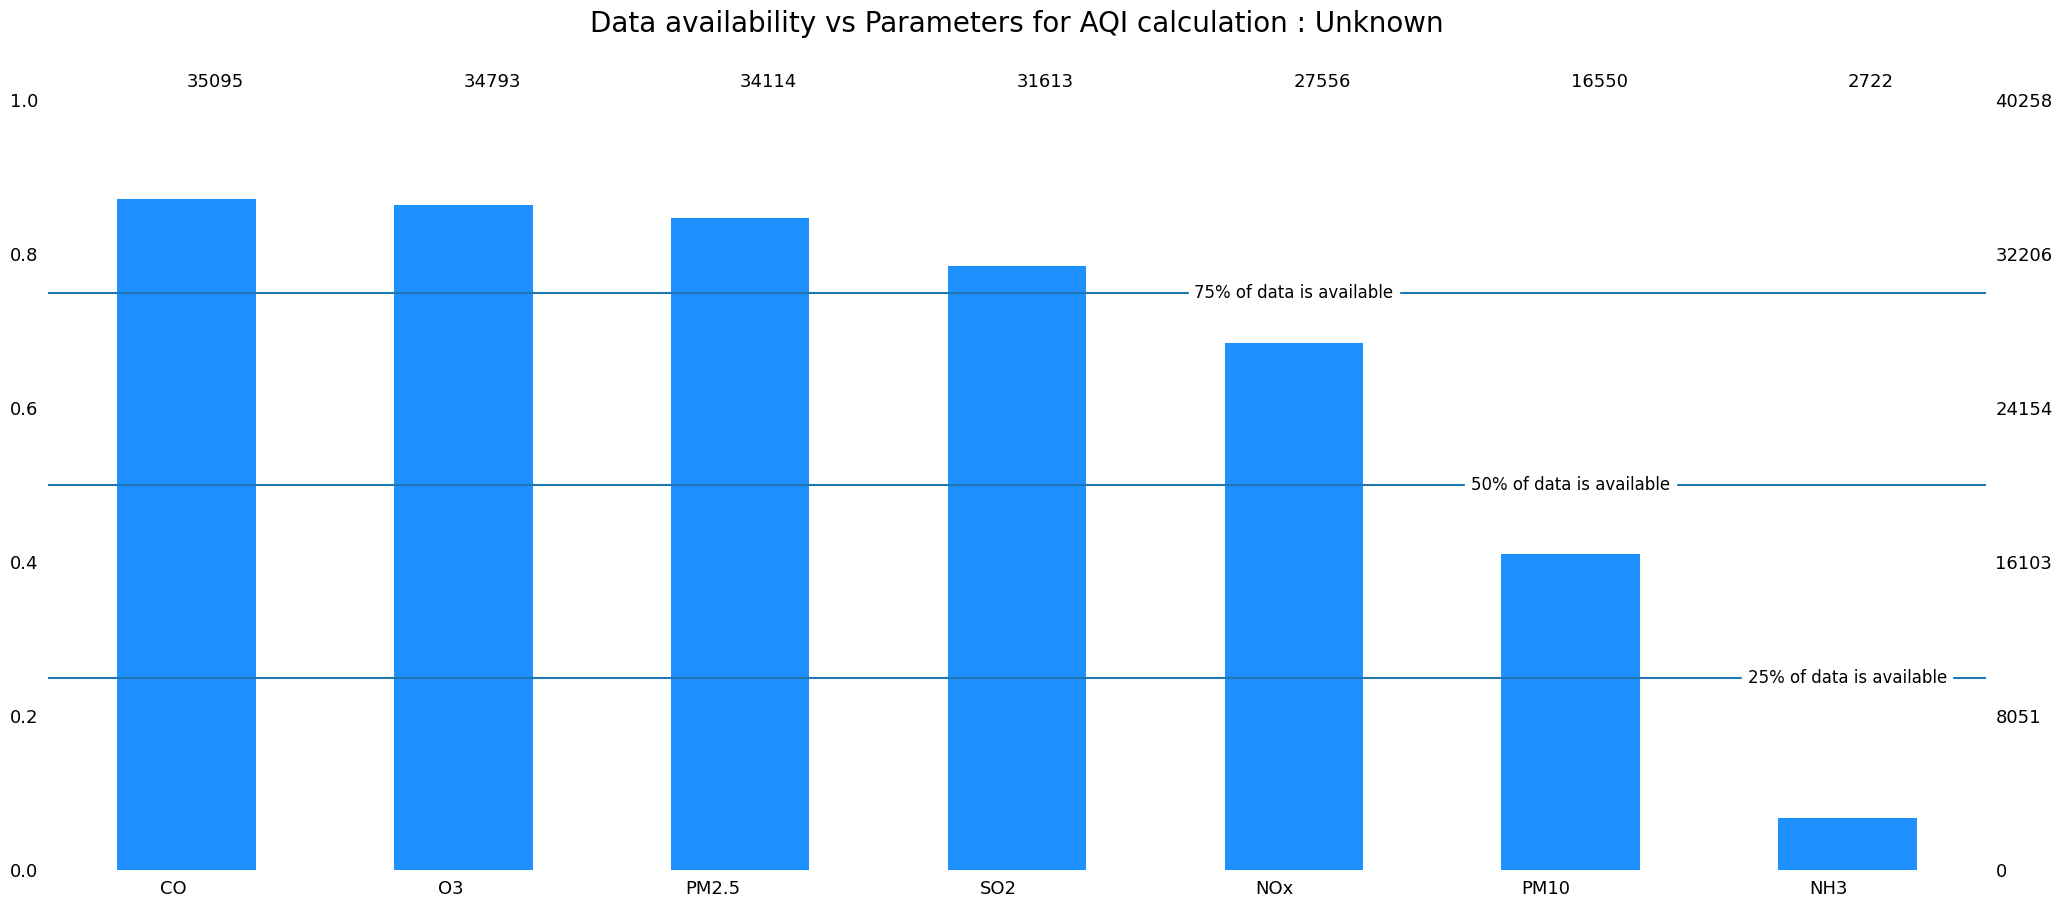

In [41]:
plot_data_availability_AQI(unknown_df, 4, 5, 6, 'Unknown')

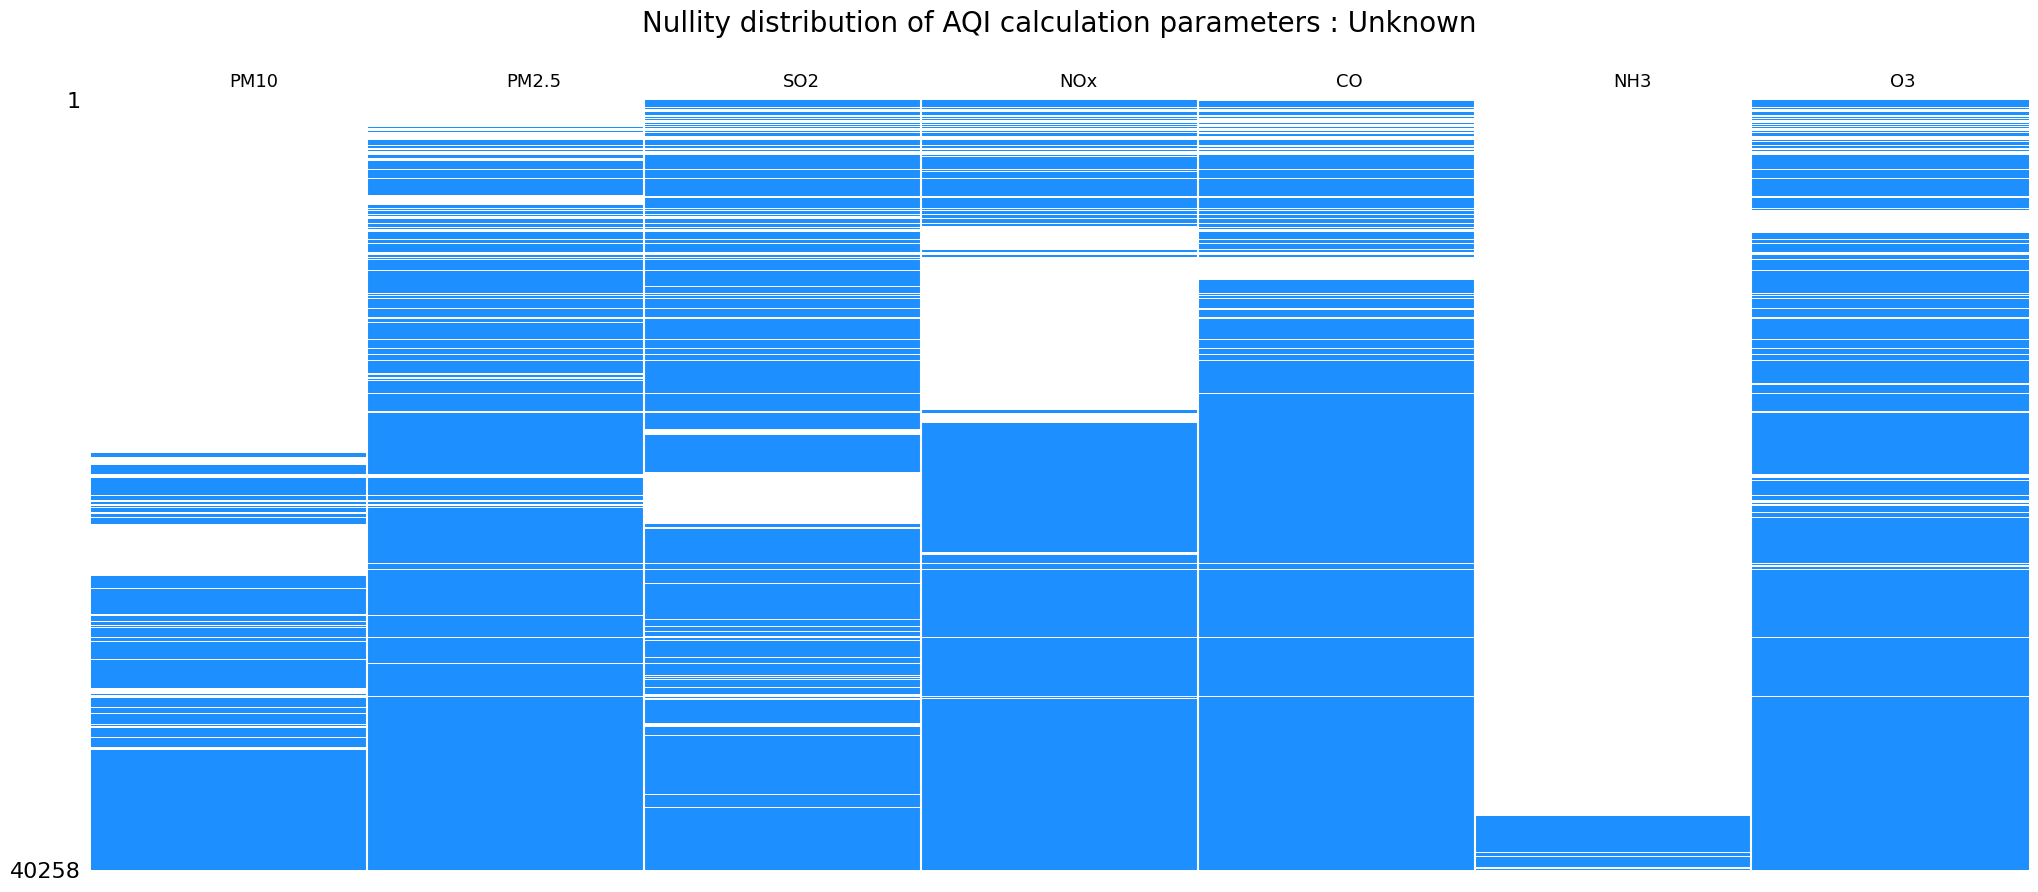

In [42]:
plot_nullity_AQI(unknown_df, 'Unknown')

- We found value for `O3` for first time and records almost 85% data availablity.
- There is only 10% data available for `NH3`, and less than 50% for `PM10`.
- Considering whole parameters, about 50% of columns are empty.

## Distribution of important paramters

In [43]:
def plot_params_distribution(parameter):
    
    plt.figure(figsize = (20, 5))
    try: sns.lineplot(x = 'MM_YY', y = parameter, data = unknown_df[unknown_df.index.year >= 2020], errorbar = None, legend='brief', label = 'Unknown', color = 'r')
    except : pass
    try: sns.lineplot(x = 'MM_YY', y = parameter, data = vikas_sadan_df, errorbar = None, legend='brief', label = 'Vikas Sadan', color = 'm')
    except : pass
    try: sns.lineplot(x = 'MM_YY', y = parameter, data = sector51_df, errorbar = None, legend='brief', label = 'Sector 51', color = 'b')
    except : pass
    try: sns.lineplot(x = 'MM_YY', y = parameter, data = nise_df, errorbar = None, legend='brief', label = 'NISE', color = 'g')
    except : pass
    try: sns.lineplot(x = 'MM_YY', y = parameter, data = teri_gram_df, errorbar = None, legend='brief', label = 'Teri Gram', color = 'c')
    except : pass
    
    plt.title(f"'{parameter}' distribution across stations from 2020\n", size = 15)
    plt.xlabel('Month and Year')
    plt.ylabel(f'{parameter} Value')
    plt.xticks(rotation = 60)
    plt.show()

In [44]:
stations = [vikas_sadan_df, sector51_df, nise_df, teri_gram_df, unknown_df, gurugram_df]
sub_index_list = ['PM10_sub_idx', 'PM25_sub_idx', 'SO2_sub_idx', 'NOx_sub_idx', 'CO_sub_idx', 'O3_sub_idx', 'NH3_sub_idx']

for station in stations:
    create_date_time_features(station)

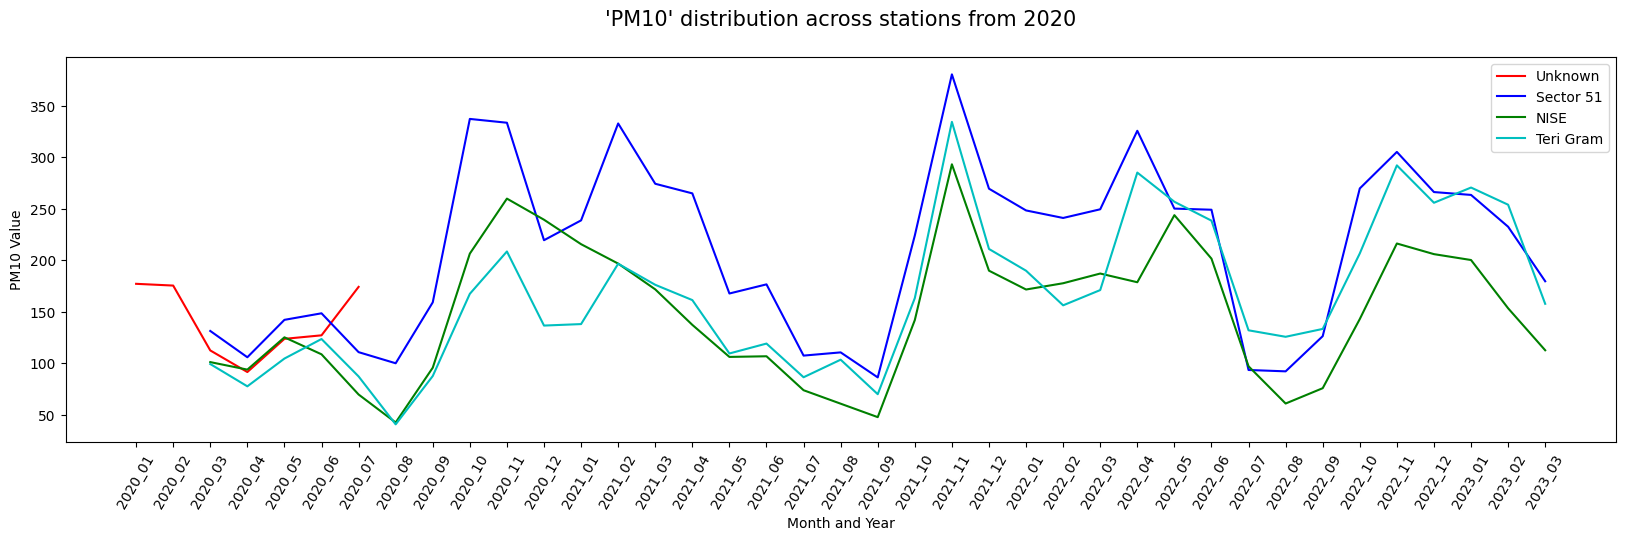

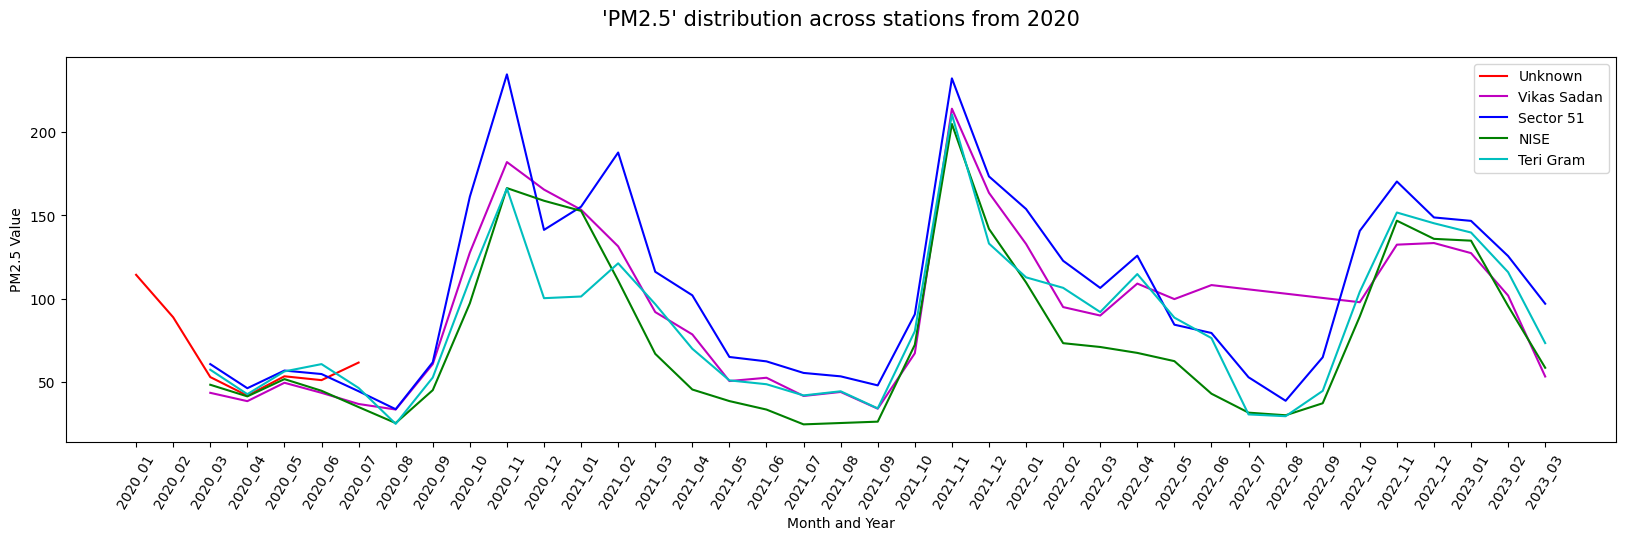

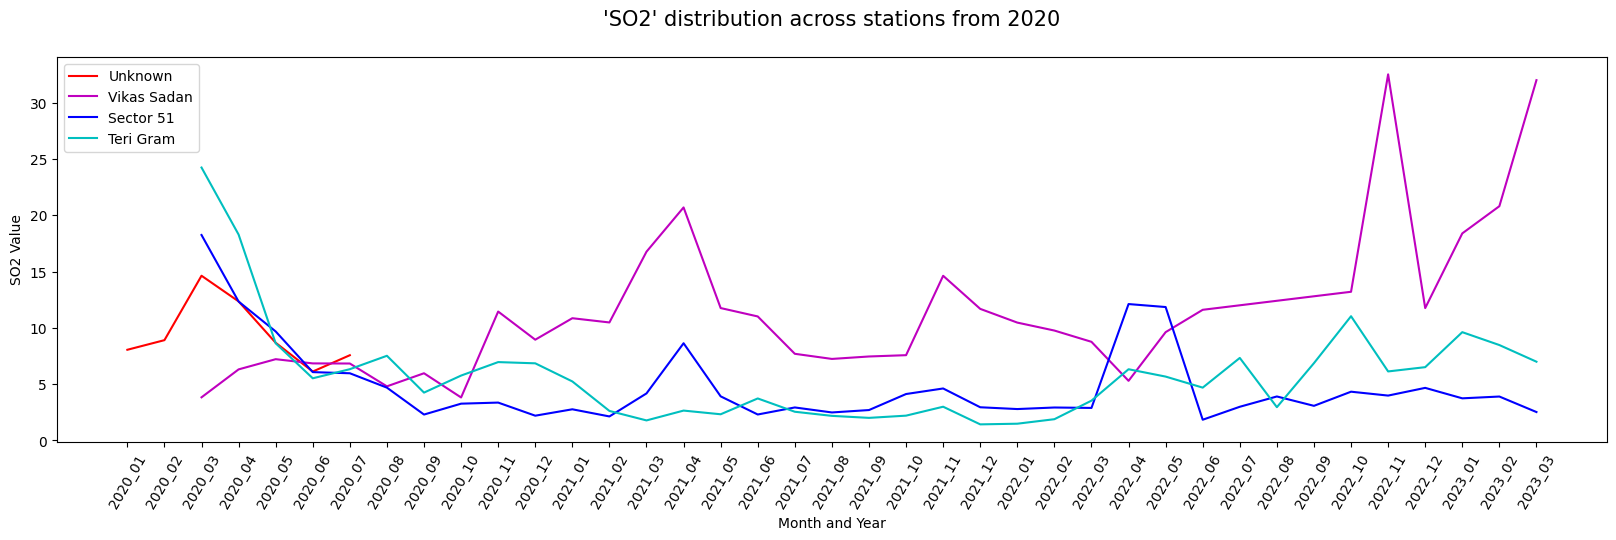

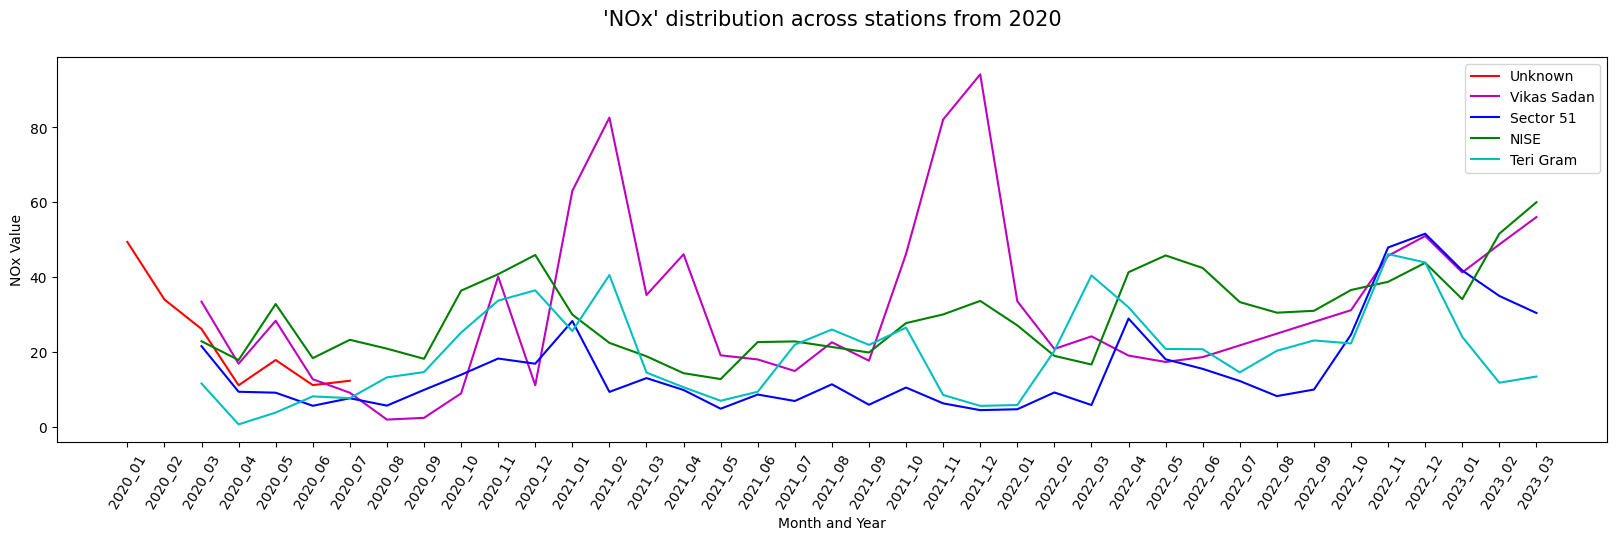

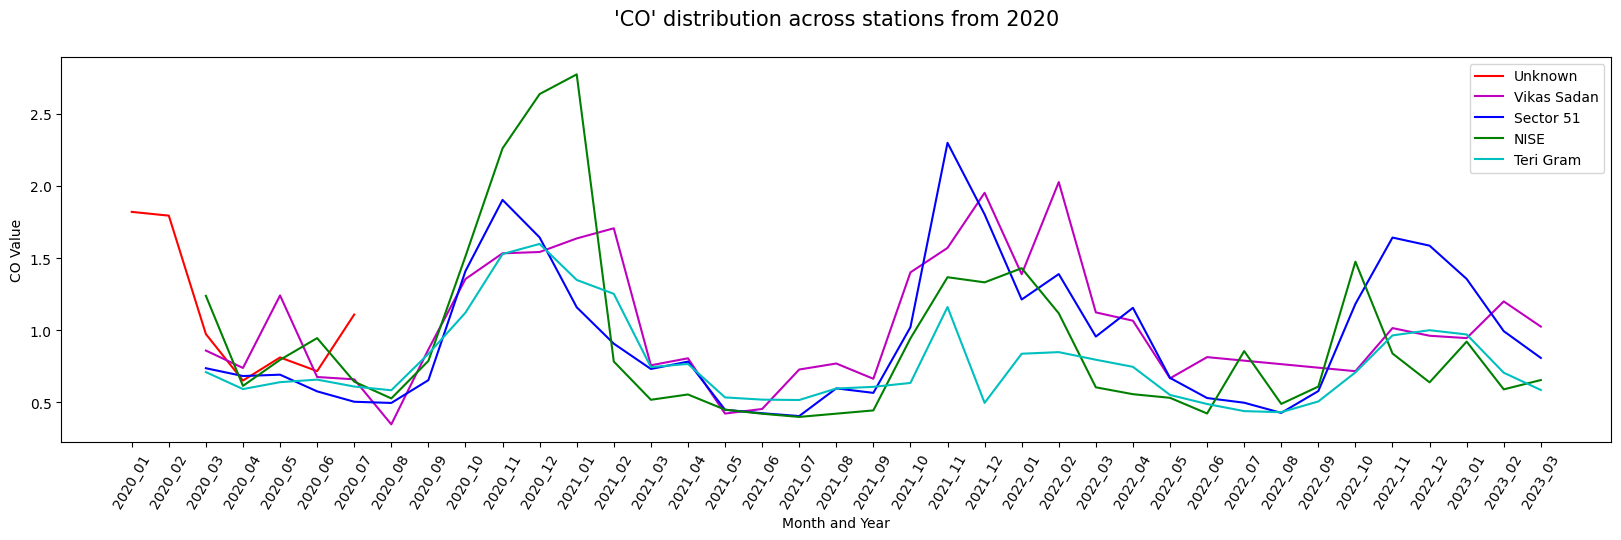

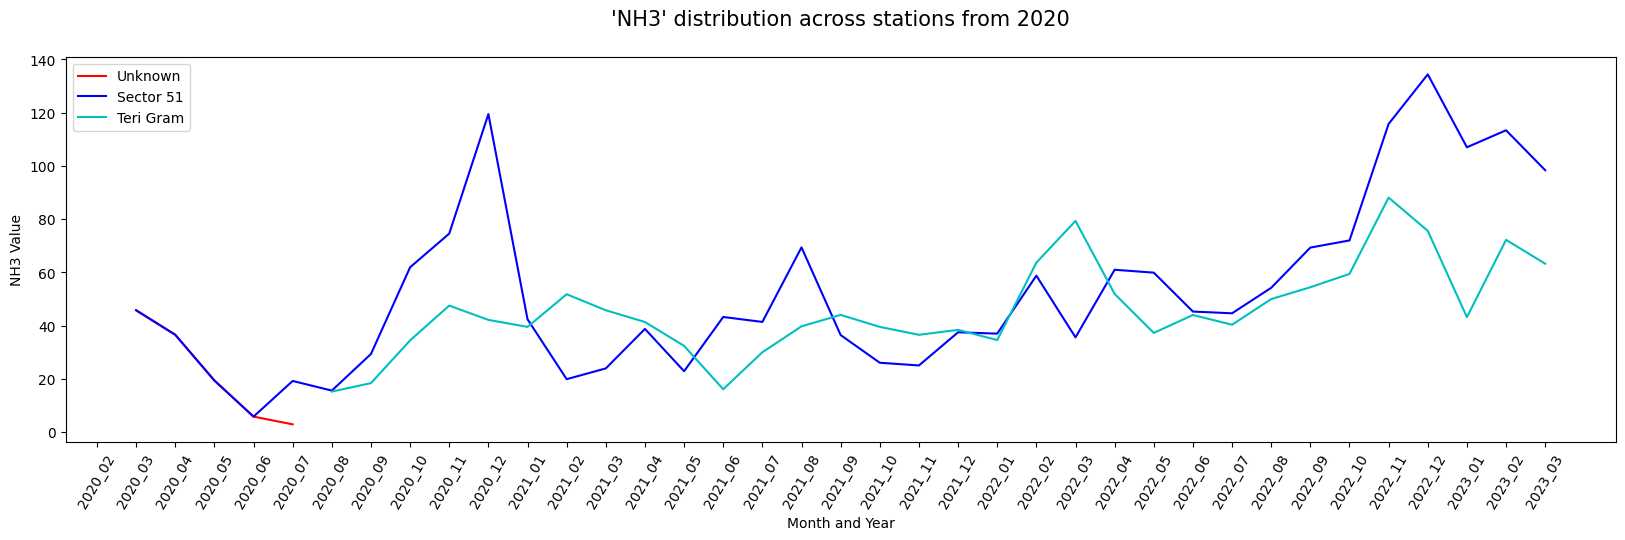

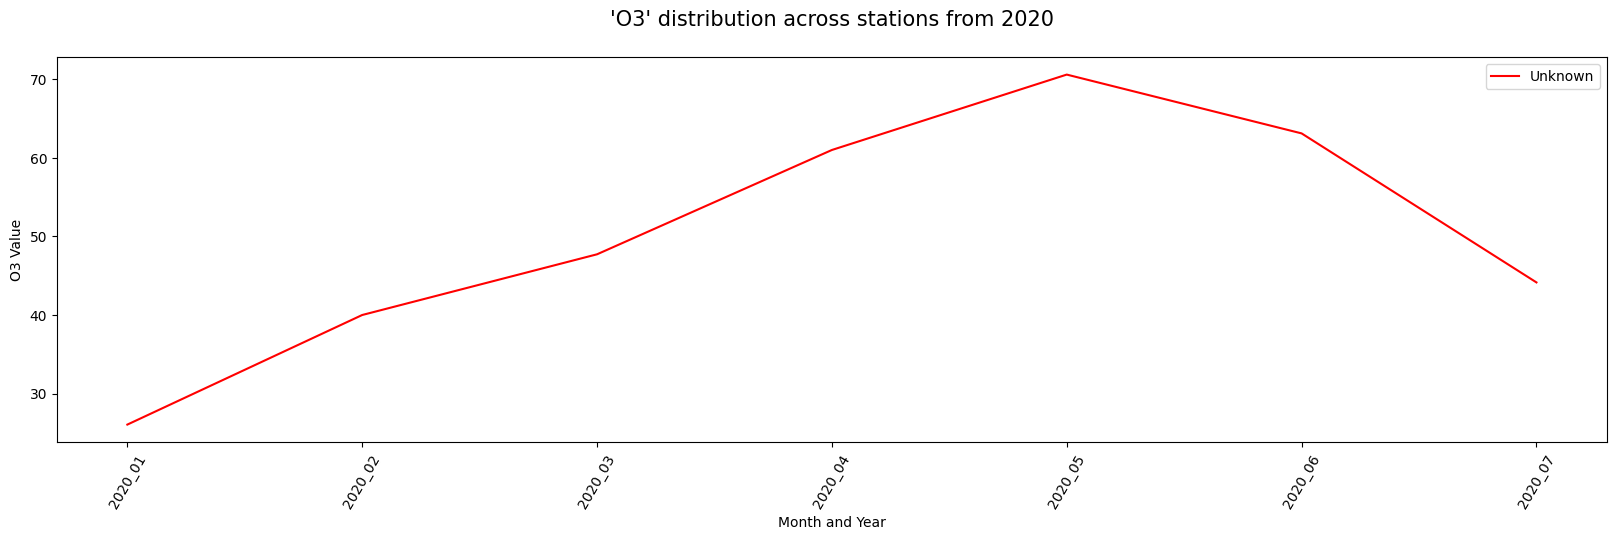

In [45]:
for param in imp_AQI_params:
    plot_params_distribution(param)

- Now its a clear indication **mean**, **median** and **mode** imputation is not a good option here.
- Last Observation Carried Forward (*bfill()*) or Next Observation Carried Backward (*ffill()*) can be used to fill missing values.
- The `PM10`, `PM2.5` and `CO` is showing some trend, ie may be seasonality have infuence in these parameters.
- Most of the time **Sector 51** is the upper-bound and **NISE** is the lower-bound for parameters.

## AQI and AQI Bucket Calculation

In [46]:
# https://delhitourism.gov.in/delhitourism/aboutus/seasons_of_delhi.jsp

def get_seasons(value):
    
    if value in range(2, 4):
        return 'Spring'
    elif value in range(4, 7):
        return 'Summer'
    elif value in range(7, 10):
        return 'Monsoon'
    elif value in range(10, 12):
        return 'Autumn'
    elif value == 12 or value == 1:
        return 'Winter'
    else:
        return np.nan

In [47]:
def get_AQI_Calculater(station_df, sub_idx_list):
    
    station_df['PM10_sub_idx'] = station_df['PM10'].apply(lambda x : round(get_PM10_Sub_Index(x), 0))
    station_df['PM25_sub_idx'] = station_df['PM2.5'].apply(lambda x : round(get_PM25_Sub_Index(x), 0))
    station_df['SO2_sub_idx'] = station_df['SO2'].apply(lambda x : round(get_SO2_Sub_Index(x), 0))
    station_df['NOx_sub_idx'] = station_df['NOx'].apply(lambda x : round(get_NOx_Sub_Index(x), 0))
    station_df['CO_sub_idx'] = station_df['CO'].apply(lambda x : round(get_CO_Sub_Index(x), 0))
    station_df['O3_sub_idx'] = station_df['NH3'].apply(lambda x : round(get_O3_Sub_Index(x), 0))
    station_df['NH3_sub_idx'] = station_df['O3'].apply(lambda x : round(get_NH3_Sub_Index(x), 0))
    
    station_df['Check'] = (station_df['PM10_sub_idx'] > 0).astype(int) + (station_df['PM25_sub_idx'] > 0).astype(int) + \
                            (station_df['SO2_sub_idx'] > 0).astype(int) + (station_df['NOx_sub_idx'] > 0).astype(int) + \
                            (station_df['CO_sub_idx'] > 0).astype(int) + (station_df['O3_sub_idx'] > 0).astype(int) + \
                            (station_df['NH3_sub_idx'] > 0).astype(int)
    
    station_df['AQI_Calculated'] = station_df[sub_idx_list].max(axis = 1)
    station_df.loc[station_df.PM10_sub_idx + station_df.PM25_sub_idx <= 0, 'AQI_Calculated'] = np.nan
    station_df.loc[station_df.Check < 3, 'AQI_Calculated'] = np.nan
    station_df.drop('Check', axis = 1, inplace = True)
    
    return station_df

In [48]:
for station in stations:
    station['Seasons'] = station.Month.apply(get_seasons)
    station = get_AQI_Calculater(station, sub_index_list)
    station['AQI_Bucket'] = station.AQI_Calculated.apply(get_AQI_Bucket)
    
print(f'Sahpe of dataframes post calculation of AQI : {vikas_sadan_df.shape}\n')
vikas_sadan_df.head(3)

Sahpe of dataframes post calculation of AQI : (26816, 44)



,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,Toluene,...,Seasons,PM10_sub_idx,PM25_sub_idx,SO2_sub_idx,NOx_sub_idx,CO_sub_idx,O3_sub_idx,NH3_sub_idx,AQI_Calculated,AQI_Bucket
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-04 00:00:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.50,3.01,5.08,2.04,5.98,...,Spring,NaN,103.0,13.0,165.0,113.0,NaN,NaN,165.0,3_Moderate
2020-03-04 01:00:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,6.15,2.00,5.97,...,Spring,NaN,95.0,7.0,191.0,142.0,NaN,NaN,191.0,3_Moderate
2020-03-04 02:00:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.60,1.85,12.72,2.02,6.07,...,Spring,NaN,111.0,10.0,283.0,92.0,NaN,NaN,283.0,4_Poor


## Data Viz. post 2020

In [49]:
def plot_avg_AQI_plot(dataframe, x_ax, x_ti, title_, year_, barmode_ = 'group', hisfn = 'avg', hisfn_ti = 'Average'):
    
    fig = px.histogram(dataframe.sort_values('Year'), x = x_ax, y = 'AQI_Calculated', histfunc = hisfn,
                       color = 'Year', barmode = barmode_, title = title_ + f'<br><sub>Year : {year_}</sub>')

    fig.update_layout(xaxis_title = x_ti,
                      yaxis_title = f'{hisfn_ti} AQI recorded',
                      xaxis_type = 'category',
                      template = 'plotly_white',
                      bargap = 0.04)
    
    if x_ax == 'Week_Day':
        fig.update_xaxes(categoryarray = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    if x_ax == 'MonthName':
        fig.update_xaxes(categoryarray = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    if x_ax == 'Seasons':
        fig.update_xaxes(categoryarray = ['Winter', 'Spring', 'Summer', 'Monsoon', 'Autumn'])
                                                            
    fig.show()

In [50]:
def plt_AQI_Category(dataframe, x_axis, title_, year_, all_ = False):
    
    fig = px.histogram(dataframe.sort_values('AQI_Bucket'), x = x_axis, color = 'AQI_Bucket',
                       barmode = 'group', title = f'{title_} vs AQI Category Count' + f'<br><sub>Year : {year_}</sub>',
                       color_discrete_sequence = ['#01e400', '#ffff01', '#ff7e00', '#fe0000', '#98004b', '#7d0022'])    
    
    # https://stackoverflow.com/a/64378982
    newnames = {'1_Good' : 'Good', '2_Satisfactory': 'Satisfactory', '3_Moderate' : 'Moderate',
                '4_Poor' : 'Poor', '5_Very Poor' : 'Very Poor', '6_Severe' : 'Severe'}
    fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                          legendgroup = newnames[t.name],
                                          hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
    
    fig.update_layout(xaxis_title = title_,
                      yaxis_title = 'AQI Category Count',
                      legend_title = 'AQI Category',
                      xaxis_type = 'category',
                      template = 'plotly_white',
                      bargap = 0.05)
    
    if x_axis == 'Week_Day':
        fig.update_xaxes(categoryarray = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    if x_axis == 'MonthName':
        fig.update_xaxes(categoryarray = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    if x_axis == 'Seasons':
        fig.update_xaxes(categoryarray = ['Winter', 'Spring', 'Summer', 'Monsoon', 'Autumn'])
    if all_:
        fig.update_xaxes(categoryarray = [2015, 2016, 2017, 2018, 2019, 2020, 2021 ,2022, 2023])
        
    fig.show()

### AQI vs WeekDays

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year >= 2020'), 'Week_Day', 'WeekDay', 'WeekDay vs Average AQI', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234918644-2321dd0a-b208-4fd3-8f9f-7db77932dc75.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year >= 2020'), 'Week_Day', 'Week_day', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234918655-1778d892-cfed-47a7-9b16-a3d2bda3f07b.svg'>

### AQI vs Months

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year >= 2020'), 'MonthName', 'Month', 'Month vs Average AQI', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234919379-44e08011-ee76-4096-b29c-c5b33fa10aaa.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year >= 2020'), 'MonthName', 'Month', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234919393-39ffb48e-11f9-4534-8b1c-446c5414ba57.svg'>

### AQI vs Seasons

- Winter : December to January
- Spring : Feburary to March
- Summer : April to June
- Monsoon : July to September
- Autumn : October end to November

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year >= 2020'), 'Seasons', 'Seasons', 'Season vs Average AQI', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920311-64bce881-8368-4453-a99b-9735161b40ed.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year >= 2020'), 'Seasons', 'Season', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920322-0fe37d92-0875-4b8f-b216-fb08b16752f6.svg'>

### AQI vs Years

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year >= 2020'), 'Year', 'Year', 'Year vs Average AQI', 'Year greater than 2020', barmode_ = 'relative')

<img src = 'https://user-images.githubusercontent.com/83589431/234919810-6e622ee5-1268-4e38-9dfe-2c36dd0062c2.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year >= 2020'), 'Year', 'Year', 'Year greater than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234919821-f3c69c00-a7be-466d-8391-e2da7612d2b5.svg'>

- AQI based on WeekDay, from 2020 to 2022 shows a clear increase in average AQI value, ie requction in Air quality.
- 2023's Mondays and Tuesdays shows improvement in Air quality compared to previous years.
- The seasonality have an importance role in the air quality change, this is clearlt cisible in
    1. *Month vs Average AQI* plot
    2. *Month vs AQI Category Count* plot
- Months November and December accounts for the worst air quality in each year and July and Augest accounts for the best quality.
- The reason for less polution during July to September is due to monsoon (rainy) season.
- Autumn accounts for the less quality air during all the years.
- In 2020 we can say the quality of air is comparitively good compared to post 2020.

## Data Viz. pre 2020

### AQI vs WeekDays

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year < 2020'), 'Week_Day', 'WeekDay', 'WeekDay vs Average AQI', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920547-f12abec4-d9ac-4c17-8ac2-993d623a4297.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year < 2020'), 'Week_Day', 'WeekDay', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920560-13720fa7-c3a2-45a4-8145-ac2fcf8e91d5.svg'>

### AQI vs Months

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year < 2020'), 'MonthName', 'Month', 'Month vs Average AQI', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920570-2a1d6648-e517-45cd-a2e7-da9878dfdf6a.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year < 2020'), 'MonthName', 'Month', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920576-2eebc590-1d62-41ab-904b-46d1e776632e.svg'>

### AQI vs Seasons

- Winter : December to January
- Spring : Feburary to March
- Summer : April to June
- Monsoon : July to September
- Autumn : October end to November

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year < 2020'), 'Seasons', 'Seasons', 'Season vs Average AQI', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920585-0b3caa8a-a8a4-42f2-9437-b0aaae0edc82.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year < 2020'), 'Seasons', 'Season', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920590-331ef191-203a-433c-be59-3e9f2743c683.svg'>

### AQI vs Years

In [ ]:
plot_avg_AQI_plot(gurugram_df.query('Year < 2020'), 'Year', 'Year', 'Year vs Average AQI', 'Year less than 2020', barmode_ = 'relative')

<img src = 'https://user-images.githubusercontent.com/83589431/234920606-2c5956f5-5bc1-4308-9f38-2a522cf266a4.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.query('Year < 2020').sort_values('Year'), 'Year', 'Year', 'Year less than 2020')

<img src = 'https://user-images.githubusercontent.com/83589431/234920612-41edb126-7e96-4c1e-a613-447c67aed929.svg'>

- In pre-2020 era the air quality almost looks similer, and the air quality was good compared to post-2020 era.
- Similar to post-2020, the air quality was better during minsoon and worst in Autumn and Winter.
- Year on year showed decrease in air quality, but an inprovement in 2019.

## Data Viz. : 2015 - 2023

In [ ]:
plt_AQI_Category(gurugram_df, 'MonthName', 'Month', 'From 2015 to 2023')

<img src = 'https://user-images.githubusercontent.com/83589431/234921350-ccf02190-8481-43ea-8f23-99b74313a20e.svg'>

In [ ]:
plot_avg_AQI_plot(gurugram_df.sort_values('Year'), 'Seasons', 'Seasons', 'Season vs Average AQI', 'From 2015 to 2023')

<img src = 'https://user-images.githubusercontent.com/83589431/234921356-adc8b78e-f18f-4e25-abaf-83f47b6a9e48.svg'>

In [ ]:
plot_avg_AQI_plot(gurugram_df.sort_values('Year'), 'Year', 'Year', 'Year vs Average AQI', 'From 2015 to 2023', barmode_ = 'relative')

<img src = 'https://user-images.githubusercontent.com/83589431/234921362-c5c22da5-3ea7-4622-b787-1071dcbff163.svg'>

In [ ]:
plt_AQI_Category(gurugram_df.sort_values('Year'), 'Year', 'Year', 'From 2015 to 2023', all_ = True)

<img src = 'https://user-images.githubusercontent.com/83589431/234921367-285a0c77-e4c7-4401-b340-57b13814027c.svg'>

- From the above plots we can conlude that, AQI is heavily influenced by seasonal changes.
- From 2015 the AQI incereses till 2018 and a fall till 2021, and another increament.

## Effect of COVID-19 on Air Quality

In [ ]:
mean_aqi_df = gurugram_df.groupby(['Year', 'MonthName', 'Month'], as_index = False)['AQI_Calculated'].mean()
mean_aqi_df['YY_MM'] = mean_aqi_df.Year.map(str) + '_' + mean_aqi_df.Month.map(str).apply(lambda x : '0' + x if len(x) < 2 else x)
mean_aqi_df = mean_aqi_df.sort_values('YY_MM')

In [ ]:
fig = px.line(mean_aqi_df.query('Year >= 2018 and Year <= 2022'), x = 'YY_MM', y = 'AQI_Calculated',
             title = 'Effect of COVID_19 on AIr Quality Index<br><sup>On Gurugram area</sup>')
fig.add_vrect('2020_03', '2020_06', line_width = 0, fillcolor = 'red', opacity = 0.2,
             annotation_text = 'COVID<br>Lockdown<br>period',
             annotation_position = 'top left')
fig.update_layout(xaxis_title = 'Month and Year',
                  yaxis_title = 'Average AQI Calculated',
                  template = 'plotly_white')
fig.show()

<img src = 'https://user-images.githubusercontent.com/83589431/234921706-36dfee79-4ce5-49ca-a8a3-60d1983bfc0e.svg'>

- The above plot proves justification to the blog post [In India, air quality has been improving despite the COVID-19 lockdown](https://blogs.worldbank.org/endpovertyinsouthasia/india-air-quality-has-been-improving-despite-covid-19-lockdown).

## Next is what ?

- There are lots of missing values present.
- The primary parameters are PM10, PM2.5, NO, NO2, NOx, CO, and SO2, we need to find methods to fill those.
- Based on the analaysis till now, there are seasonal effects thus filling with *mean* or *median* won't be a good idea.
- Last Observation Carried Forward (`ffill()`) and Next Observation Carried Backward  (`bfill()`) can be a better option with some `limit` value.
- LOCF and NOCB without `limit` parameter will turn the missing value curves into a stright line like *mean* aand *median*.
- Linear interpolation and *spline* interpolation also need to be tested for imputation.

<br>

**Jishnu S G**
- [Linkedin](https://linkedin.com/in/jishnukoliyadan/)
- [GitHub](https://github.com/jishnukoliyadan)